# Dataset Description

The dataset contains the following columns along with their data types and descriptions:

| Column Name            | Data Type   | Description                                                                 |
|------------------------|-------------|-----------------------------------------------------------------------------|
| **id**                | `int64`     | Identifier for each entry.                                                  |
| **age**               | `int64`     | Age in days.                                                               |
| **gender**            | `int64`     | Gender of the individual.                                                  |
| **height**            | `int64`     | Height in centimeters.                                                     |
| **weight**            | `float64`   | Weight in kilograms.                                                       |
| **ap_hi**             | `int64`     | Systolic blood pressure.                                                   |
| **ap_lo**             | `int64`     | Diastolic blood pressure.                                                  |
| **cholesterol**       | `int64`     | Cholesterol level categories.                                              |
| **gluc**              | `int64`     | Glucose level categories.                                                  |
| **smoke**             | `int64`     | Smoking status (binary).                                                   |
| **alco**              | `int64`     | Alcohol consumption status (binary).                                       |
| **active**            | `int64`     | Physical activity status (binary).                                         |
| **cardio**            | `int64`     | Presence of cardiovascular disease (binary).                               |
| **age_years**         | `int64`     | Age in years (derived from age in days).                                   |
| **bmi**               | `float64`   | Body Mass Index (calculated from height and weight).                       |
| **bp_category**       | `object`    | Blood pressure category (e.g., normal, high, etc.).                       |
| **bp_category_encoded** | `object`  | Encoded representation of blood pressure categories.                       |

## Notes:
- The `cardio` column indicates the presence (`1`) or absence (`0`) of cardiovascular disease.
- Derived columns such as `age_years` and `bmi` are calculated for ease of analysis.
- Categorical columns like `gender`, `cholesterol`, and `gluc` represent predefined categories.

This dataset can be used for a variety of analyses, including predictive modeling, statistical studies, and visualization tasks related to cardiovascular health.

## Data Source and Acknowledgment
Data was sourced from the UCI Machine Learning Repository and Kaggle. 

All patient data has been anonymized to ensure privacy.


# Load  Library 

In [1]:
# Preprocessing and Feature Selection
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import FactorAnalysis

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

In [2]:

data_path = '/kaggle/input/sonyvaichina/cardio_data_processed.csv'  # Update this path for each dataset
data = pd.read_csv(data_path)

In [3]:
data

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240       2     168    76.0    120     80            1     1   
68201  99995  22601       1     158   126.0    140     90            2     2   
68202  99996  19066       2     183   105.0    180     90            3     1   
68203  99998  22431       1     163    72.0    135     80            1     2   
68204  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  age_years        bmi  \
0          0     0       1       0         50  21.967120   
1          0     0       1       1         55  34.927679   
2          0     0       0       1         51  23.507805   
3          0     0       1       1         48  28.710479   
4          0     0       0       0         47  23.011177   
...      ...   ...     ...     ...        ...        ...   
68200      1     0       1       0         52  26.927438   
68201      0     0       1       1         61  50.472681   
68202      0     1       0       1         52  31.353579   
68203      0     0       0       1         61  27.099251   
68204      0     0       1       0         56  24.913495   

                bp_category   bp_category_encoded  
0      Hypertension Stage 1  Hypertension Stage 1  
1      Hypertension Stage 2  Hypertension Stage 2  
2      Hypertension Stage 1  Hypertension Stage 1  
3      Hypertension Stage 2  Hypertension Stage 2  
4                    Normal                Normal  
...                     ...                   ...  
68200  Hypertension Stage 1  Hypertension Stage 1  
68201  Hypertension Stage 2  Hypertension Stage 2  
68202  Hypertension Stage 2  Hypertension Stage 2  
68203  Hypertension Stage 1  Hypertension Stage 1  
68204  Hypertension Stage 1  Hypertension Stage 1  

[68205 rows x 17 columns]

In [4]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

# 1. Basic Information

In [5]:

print("Dataset Overview")
print("Shape of the dataset:", data.shape)
print(" ")
print("Columns in the dataset:")
print(data.columns)
print(" ")
print("\nData types and non-null counts:")
data.info()
print(" ")
print("\nSample data:")
data.head()

Dataset Overview
Shape of the dataset: (68205, 17)
 
Columns in the dataset:
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')
 

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   s

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years        bmi           bp_category  \
0     0       1       0         50  21.967120  Hypertension Stage 1   
1     0       1       1         55  34.927679  Hypertension Stage 2   
2     0       0       1         51  23.507805  Hypertension Stage 1   
3     0       1       1         48  28.710479  Hypertension Stage 2   
4     0       0       0         47  23.011177                Normal   

    bp_category_encoded  
0  Hypertension Stage 1  
1  Hypertension Stage 2  
2  Hypertension Stage 1  
3  Hypertension Stage 2  
4                Normal

# 2. Statistical Summary

In [6]:

print("\nStatistical Summary:")
data.describe()


Statistical Summary:


id           age        gender        height        weight  \
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000   
mean   49972.410498  19462.667737      1.348625    164.372861     74.100688   
std    28852.138290   2468.381854      0.476539      8.176756     14.288862   
min        0.000000  10798.000000      1.000000     55.000000     11.000000   
25%    24991.000000  17656.000000      1.000000    159.000000     65.000000   
50%    50008.000000  19700.000000      1.000000    165.000000     72.000000   
75%    74878.000000  21323.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000   
mean     126.434924     81.263925      1.363243      1.225174      0.087662   
std       15.961685      9.143985      0.678080      0.571288      0.282805   
min       90.000000     60.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      1.000000      1.000000      0.000000   
max      180.000000    120.000000      3.000000      3.000000      1.000000   

               alco        active        cardio     age_years           bmi  
count  68205.000000  68205.000000  68205.000000  68205.000000  68205.000000  
mean       0.053134      0.803548      0.493688     52.823635     27.510513  
std        0.224302      0.397317      0.499964      6.769909      6.026497  
min        0.000000      0.000000      0.000000     29.000000      3.471784  
25%        0.000000      1.000000      0.000000     48.000000     23.875115  
50%        0.000000      1.000000      0.000000     53.000000     26.346494  
75%        0.000000      1.000000      1.000000     58.000000     30.116213  
max        1.000000      1.000000      1.000000     64.000000    298.666667

# 3. Checking for Missing Values


In [7]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64


# 4. Duplicates

In [8]:

duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


# 5. Distribution of Numerical Features

In [9]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

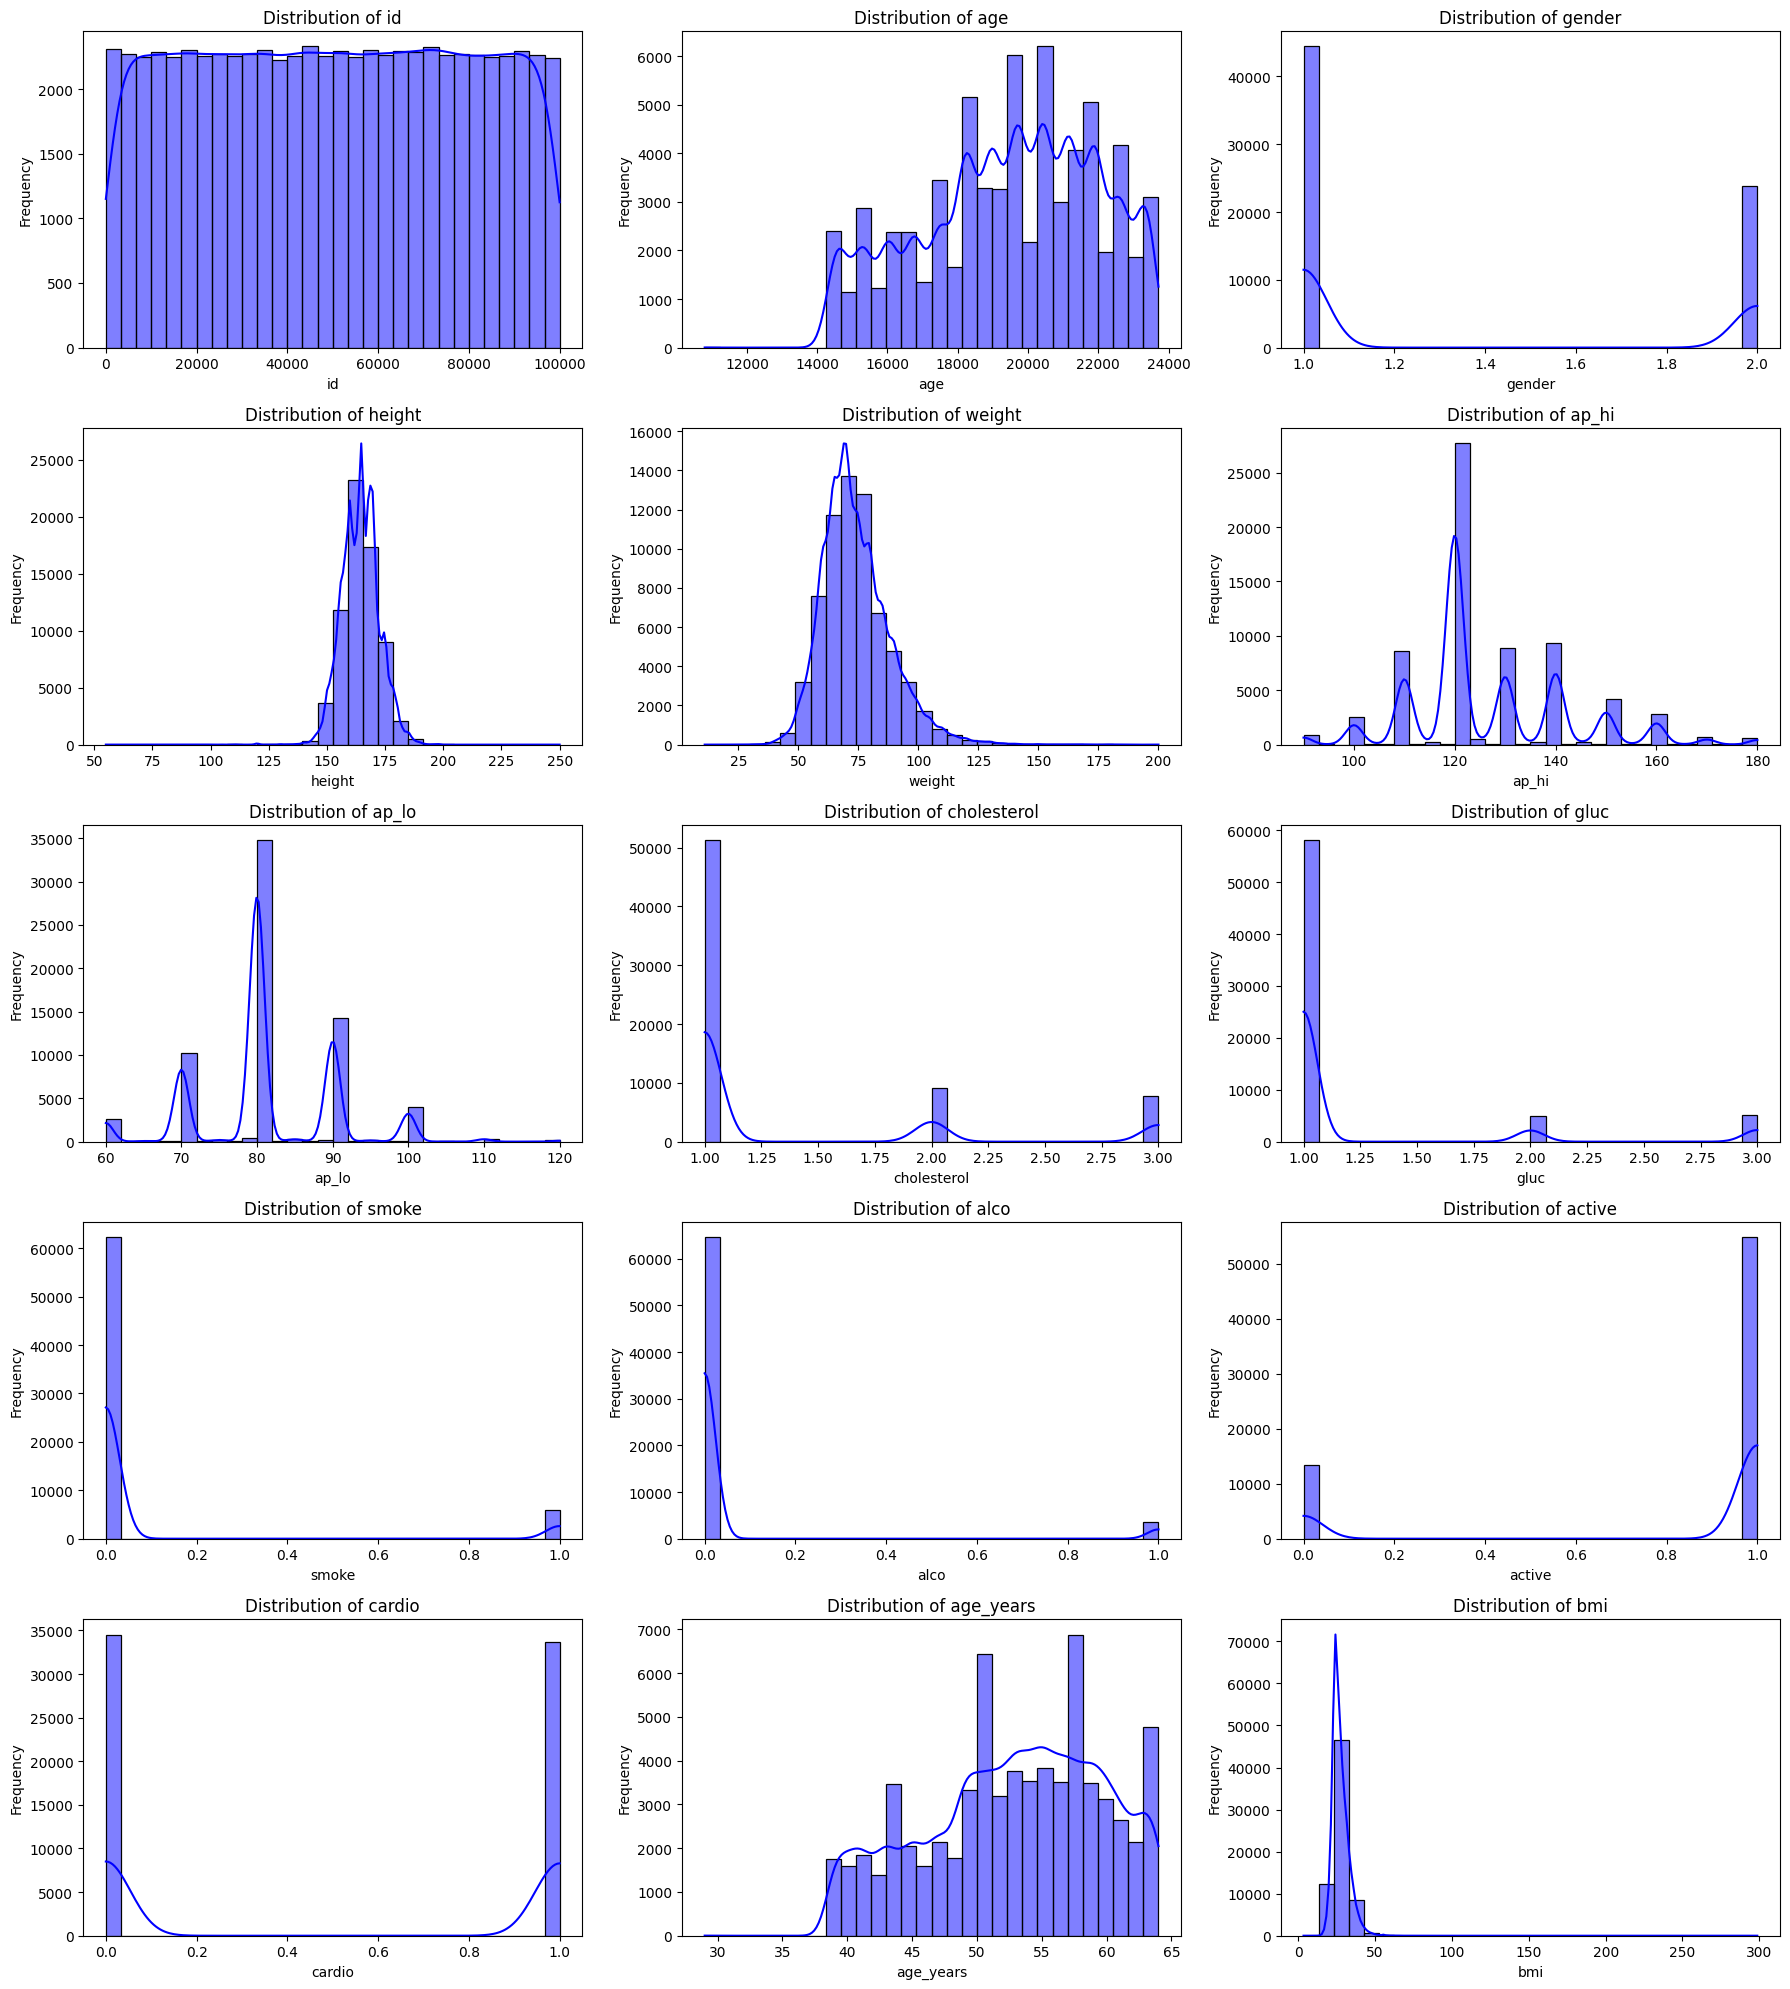

In [10]:
# Plot Distribution of Numerical Features in a Row (3 per Row)
num_cols = len(numerical_cols)
rows = (num_cols // 3) + int(num_cols % 3 != 0)  # Calculate rows based on 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten the axes for easier indexing

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 6. Correlation Matrix

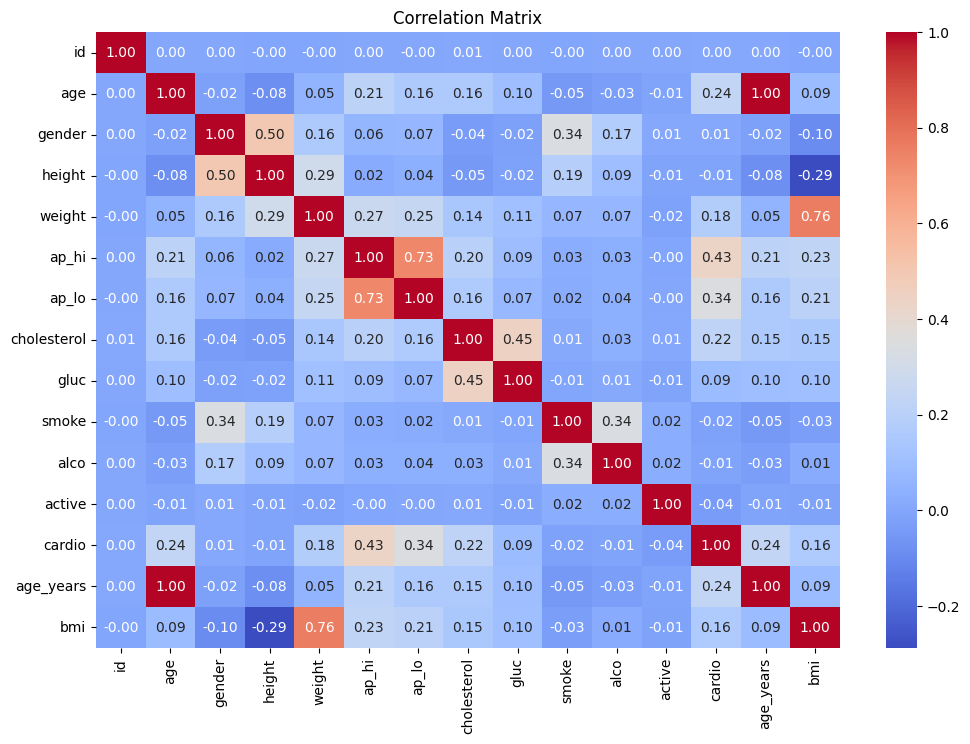

In [11]:
# Filter only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


# 7. Boxplots to Detect Outliers

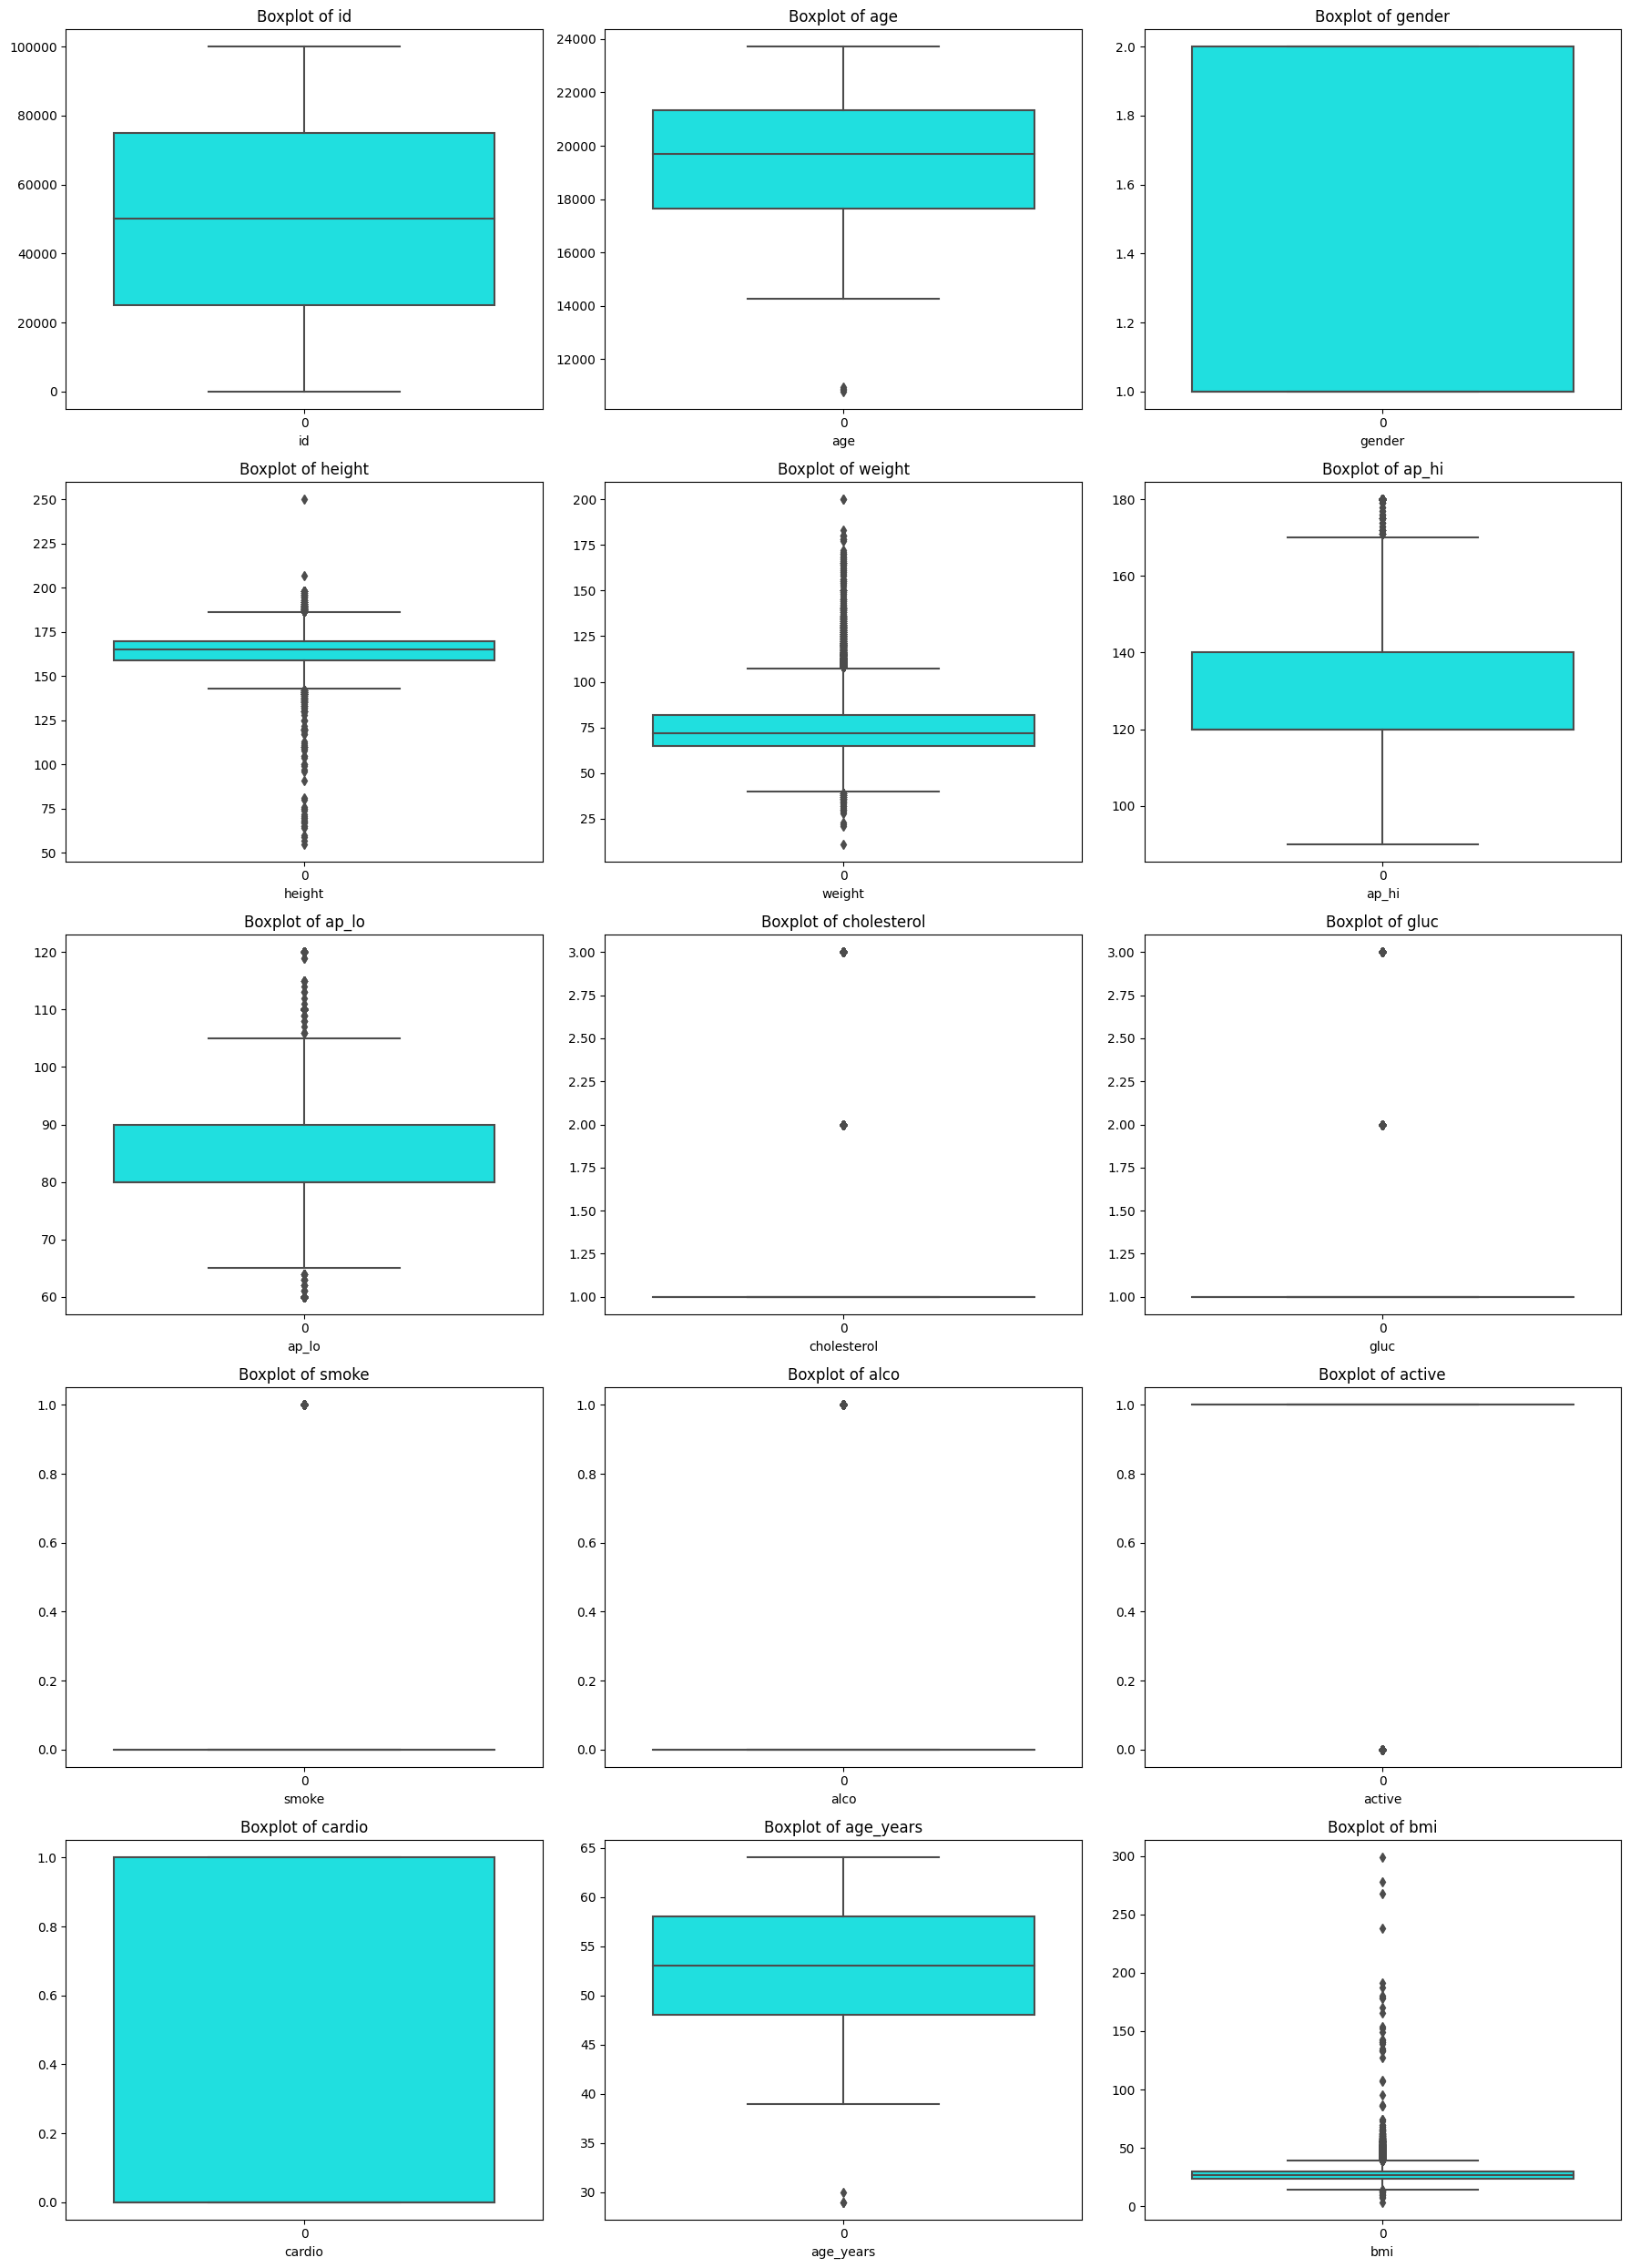

In [12]:
# Plot Boxplots for Numerical Features in Rows of 3
num_cols = len(numerical_cols)
rows = (num_cols // 3) + int(num_cols % 3 != 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten axes array for easier indexing

for i, col in enumerate(numerical_cols):
    sns.boxplot(data[col], ax=axes[i], color='cyan')
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 8. Categorical Data Analysis


Categorical Columns: Index(['bp_category', 'bp_category_encoded'], dtype='object')


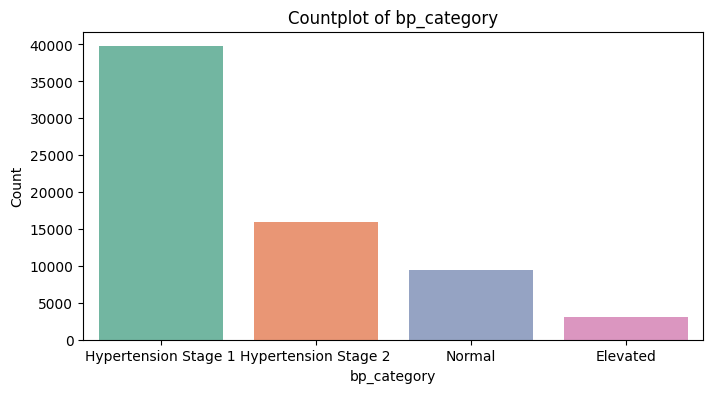

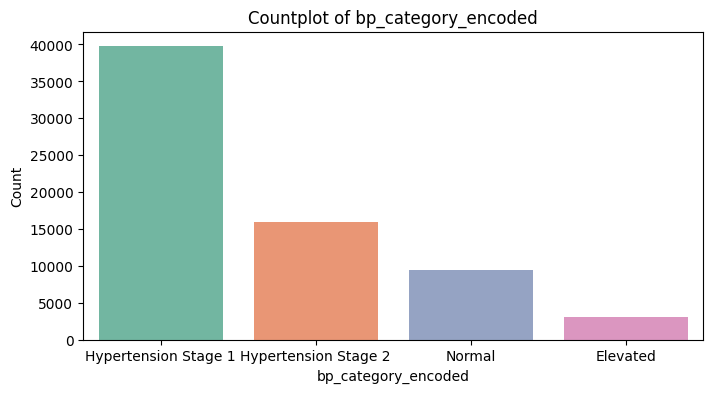

In [13]:

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:", categorical_cols)

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 9. Pair Plot (Selected Columns)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

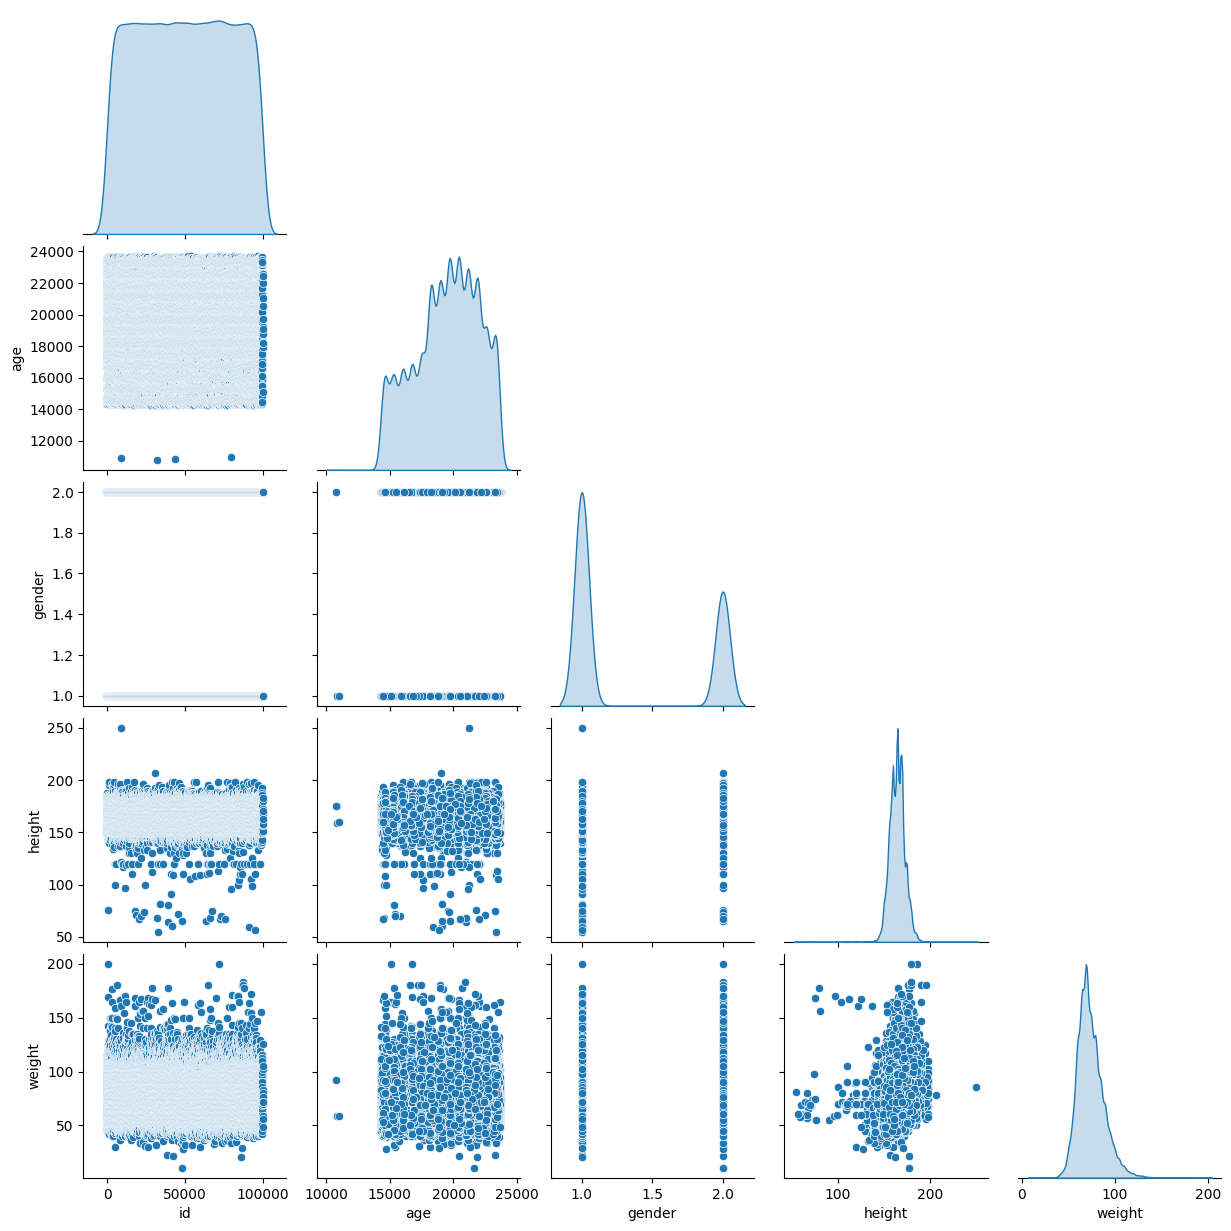

In [14]:

pair_cols = numerical_cols[:5]  # Adjust based on dataset size
sns.pairplot(data[pair_cols], diag_kind='kde', corner=True)
plt.show()


# Column wise Data Analysis 

In [15]:
data

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240       2     168    76.0    120     80            1     1   
68201  99995  22601       1     158   126.0    140     90            2     2   
68202  99996  19066       2     183   105.0    180     90            3     1   
68203  99998  22431       1     163    72.0    135     80            1     2   
68204  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  age_years        bmi  \
0          0     0       1       0         50  21.967120   
1          0     0       1       1         55  34.927679   
2          0     0       0       1         51  23.507805   
3          0     0       1       1         48  28.710479   
4          0     0       0       0         47  23.011177   
...      ...   ...     ...     ...        ...        ...   
68200      1     0       1       0         52  26.927438   
68201      0     0       1       1         61  50.472681   
68202      0     1       0       1         52  31.353579   
68203      0     0       0       1         61  27.099251   
68204      0     0       1       0         56  24.913495   

                bp_category   bp_category_encoded  
0      Hypertension Stage 1  Hypertension Stage 1  
1      Hypertension Stage 2  Hypertension Stage 2  
2      Hypertension Stage 1  Hypertension Stage 1  
3      Hypertension Stage 2  Hypertension Stage 2  
4                    Normal                Normal  
...                     ...                   ...  
68200  Hypertension Stage 1  Hypertension Stage 1  
68201  Hypertension Stage 2  Hypertension Stage 2  
68202  Hypertension Stage 2  Hypertension Stage 2  
68203  Hypertension Stage 1  Hypertension Stage 1  
68204  Hypertension Stage 1  Hypertension Stage 1  

[68205 rows x 17 columns]

In [16]:
# Define categorical columns to analyze
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_category', 'bp_category_encoded']

# Initialize an empty DataFrame for the final table
final_table = pd.DataFrame(columns=['Column', 'Value', 'Cardio=0', 'Cardio=1'])

# Loop through each categorical column
for column in categorical_columns:
    # Group by column and cardio, count occurrences
    grouped = data.groupby([column, 'cardio']).size().unstack(fill_value=0).reset_index()
    grouped.columns = ['Value', 'Cardio=0', 'Cardio=1']
    grouped['Column'] = column
    
    # Append the results to the final table
    final_table = pd.concat([final_table, grouped], ignore_index=True)

# Rearrange columns for readability
final_table = final_table[['Column', 'Value', 'Cardio=0', 'Cardio=1']]




In [17]:
final_table

Column                 Value Cardio=0 Cardio=1
0                gender                     1    22593    21834
1                gender                     2    11940    11838
2           cholesterol                     1    28953    22269
3           cholesterol                     2     3721     5470
4           cholesterol                     3     1859     5933
5                  gluc                     1    30477    27550
6                  gluc                     2     2068     2930
7                  gluc                     3     1988     3192
8                 smoke                     0    31346    30880
9                 smoke                     1     3187     2792
10                 alco                     0    32629    31952
11                 alco                     1     1904     1720
12               active                     0     6270     7129
13               active                     1    28263    26543
14          bp_category              Elevated     2100     1001
15          bp_category  Hypertension Stage 1    21927    17823
16          bp_category  Hypertension Stage 2     3176    12761
17          bp_category                Normal     7330     2087
18  bp_category_encoded              Elevated     2100     1001
19  bp_category_encoded  Hypertension Stage 1    21927    17823
20  bp_category_encoded  Hypertension Stage 2     3176    12761
21  bp_category_encoded                Normal     7330     2087

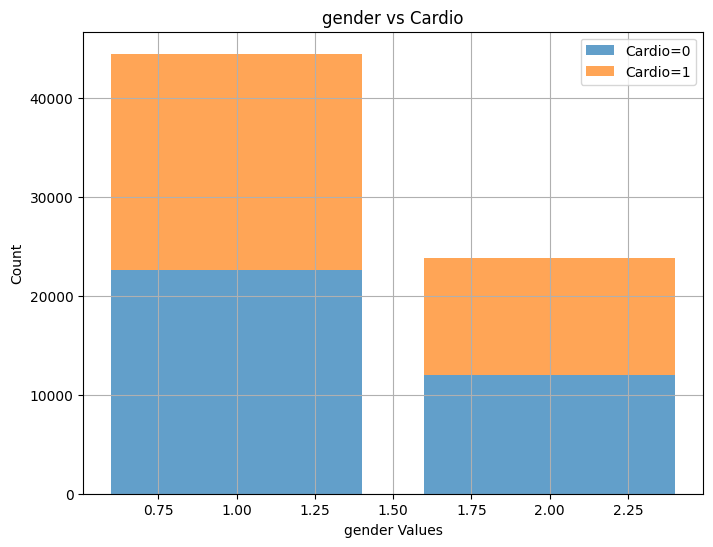

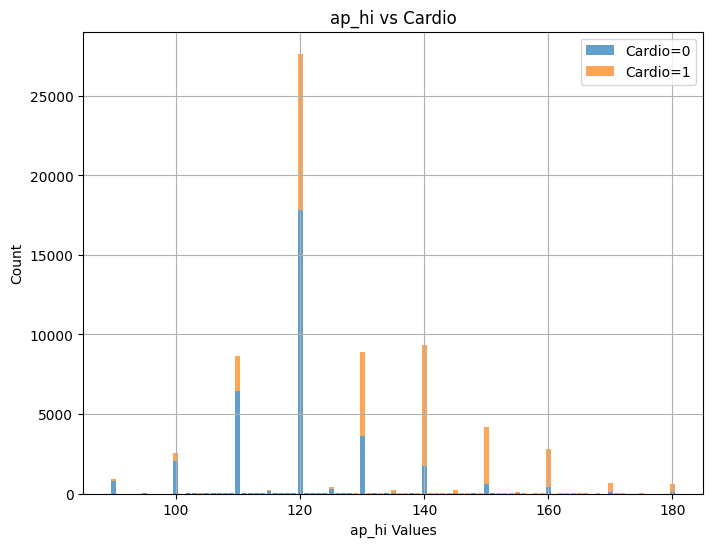

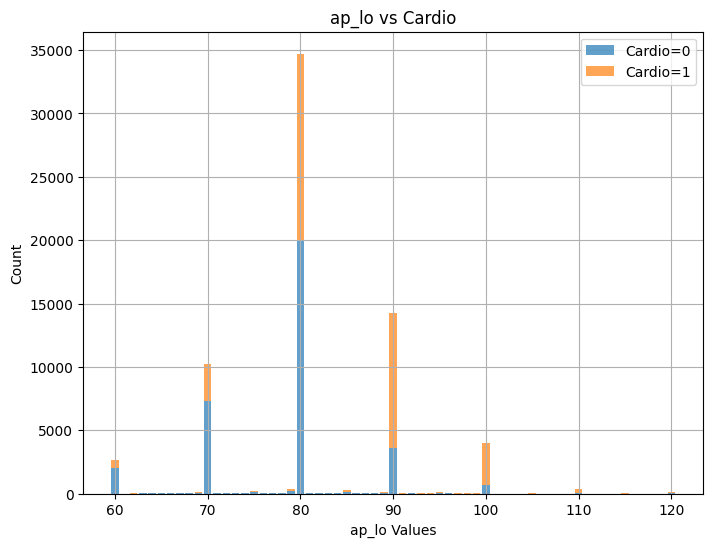

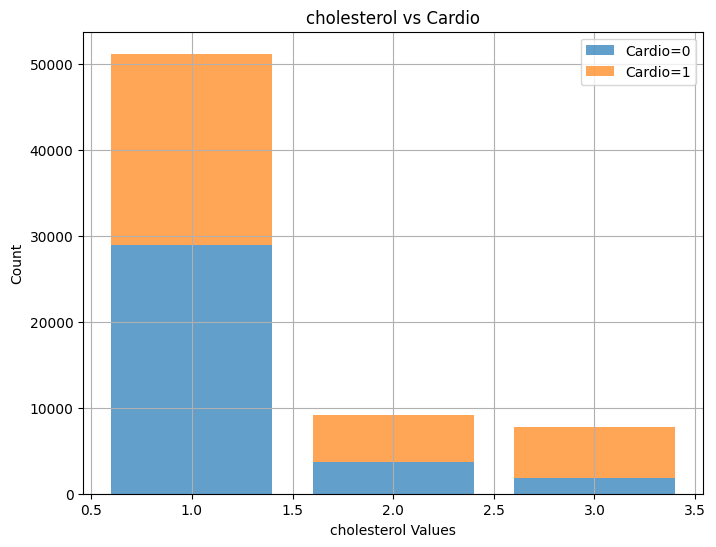

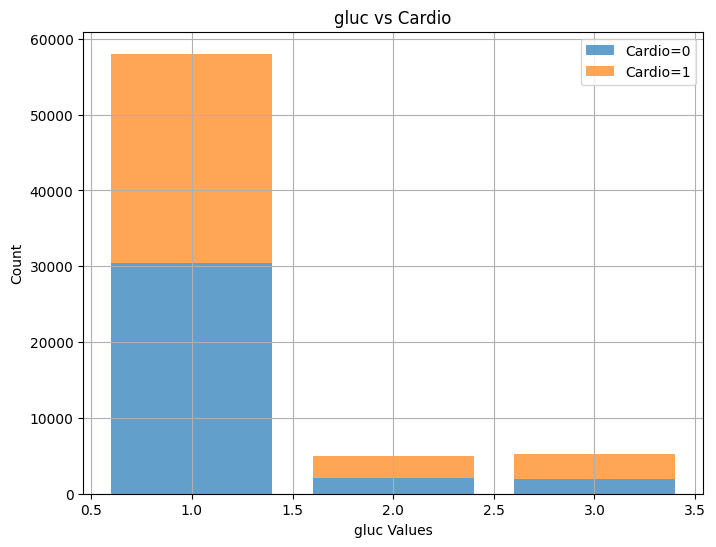

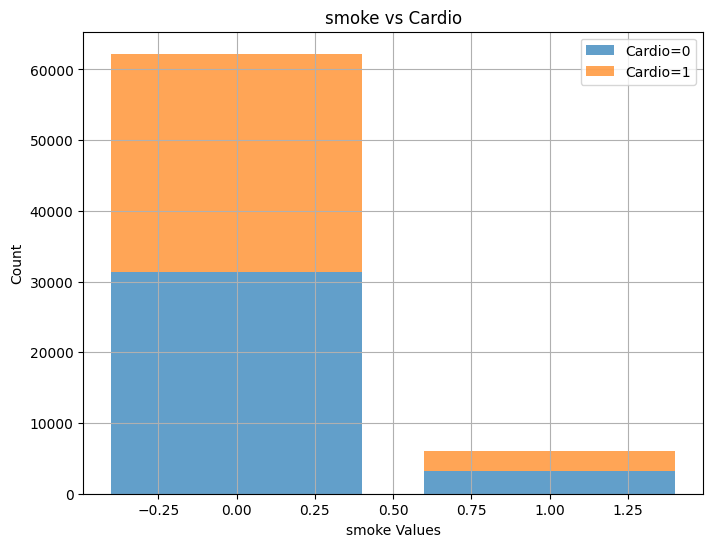

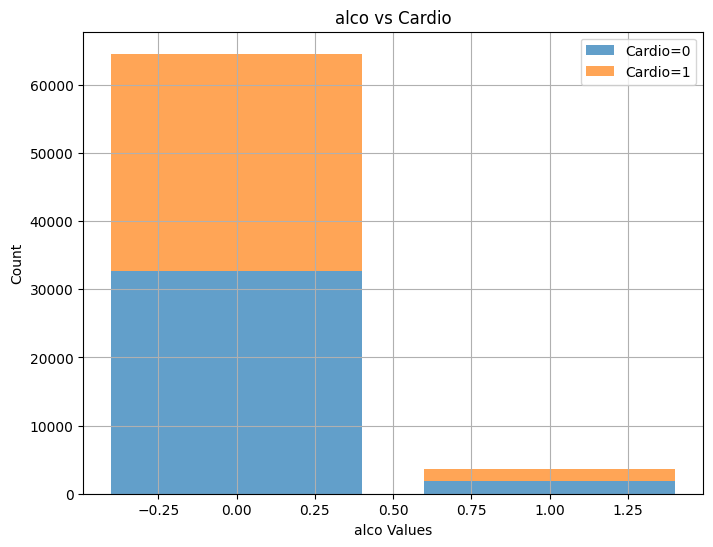

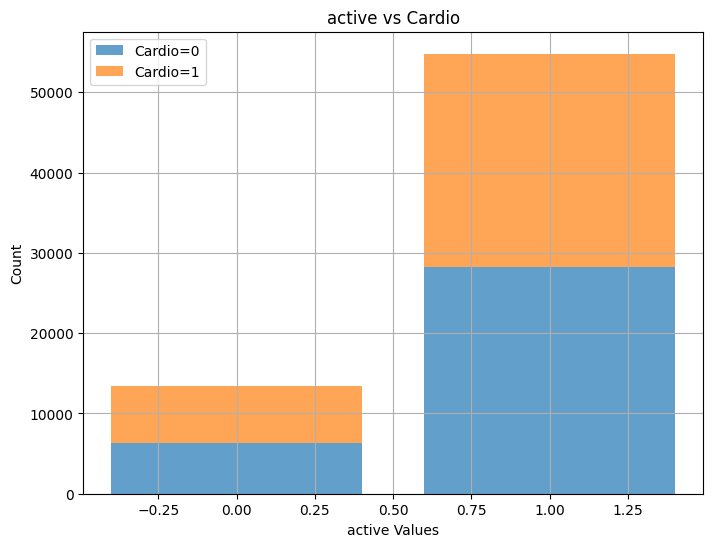

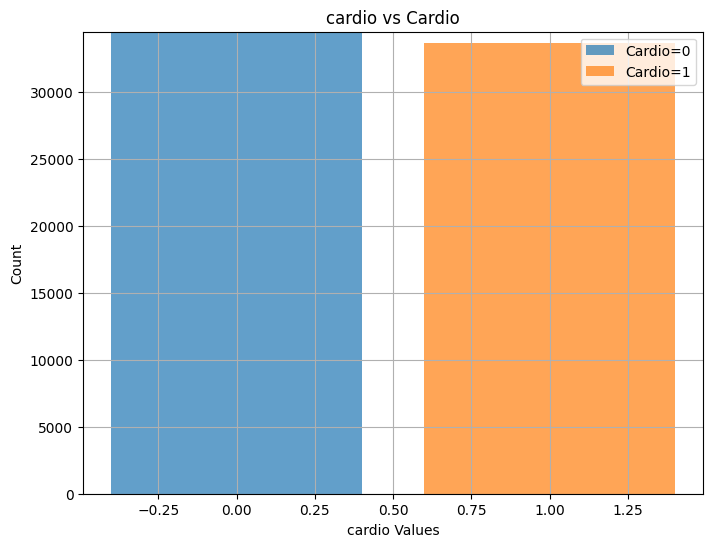

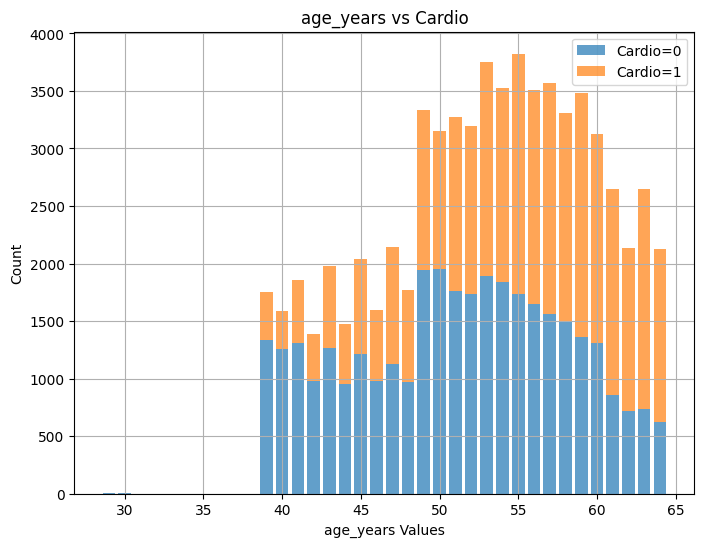

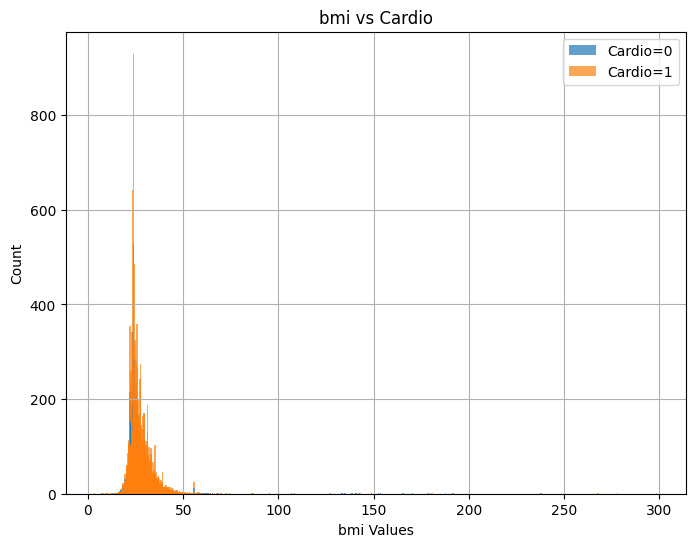

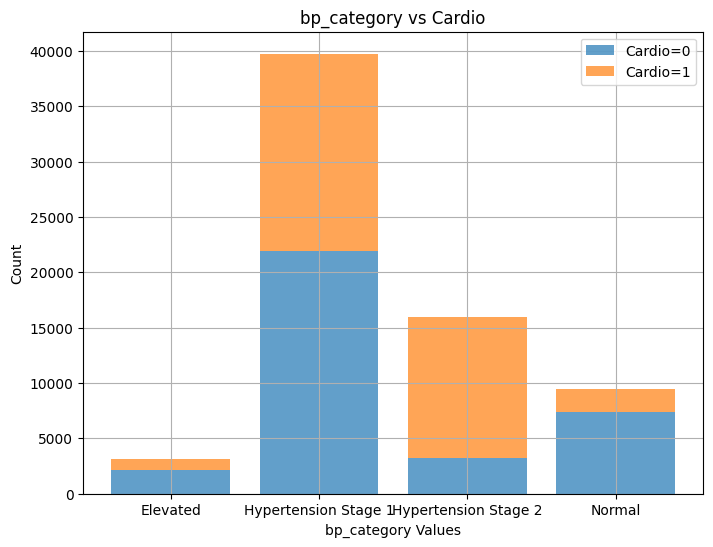

In [18]:
# List of all columns to analyze
all_columns = ['gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 
               'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category']

# Initialize an empty DataFrame for storing grouped data
final_table = pd.DataFrame(columns=['Column', 'Value', 'Cardio=0', 'Cardio=1'])

# Loop through each column in the dataset and group data
for column in all_columns:
    grouped = data.groupby([column, 'cardio']).size().unstack(fill_value=0).reset_index()
    grouped.columns = ['Value', 'Cardio=0', 'Cardio=1']
    grouped['Column'] = column
    final_table = pd.concat([final_table, grouped], ignore_index=True)

# Plot histograms for all columns
for column in all_columns:
    # Filter data for the current column
    column_data = final_table[final_table['Column'] == column]
    
    # Plot histogram for Cardio=0 and Cardio=1
    plt.figure(figsize=(8, 6))
    plt.bar(column_data['Value'], column_data['Cardio=0'], alpha=0.7, label='Cardio=0')
    plt.bar(column_data['Value'], column_data['Cardio=1'], alpha=0.7, label='Cardio=1', bottom=column_data['Cardio=0'])
    plt.title(f"{column} vs Cardio")
    plt.xlabel(f"{column} Values")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.show()


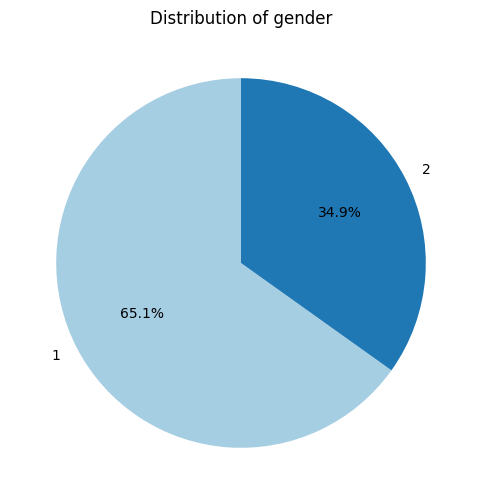

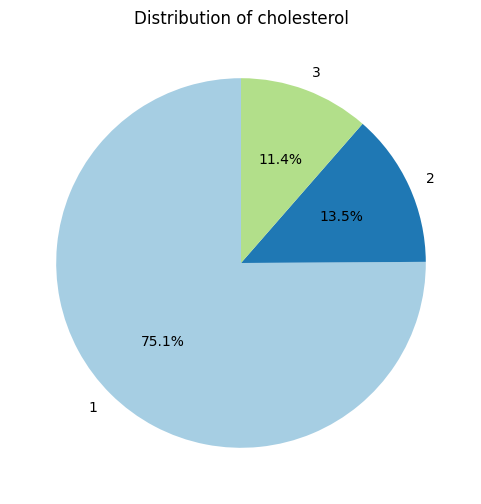

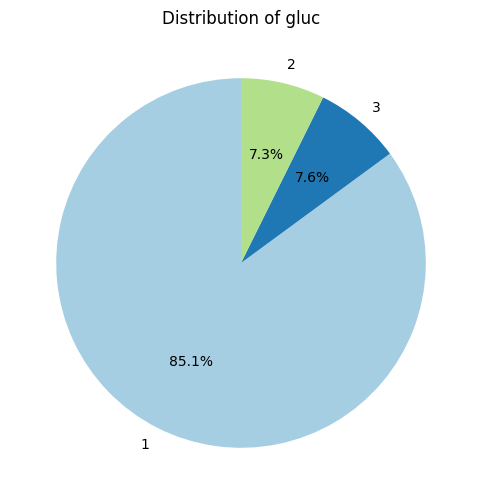

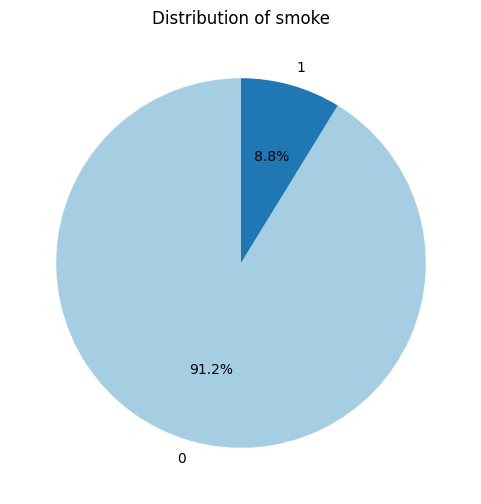

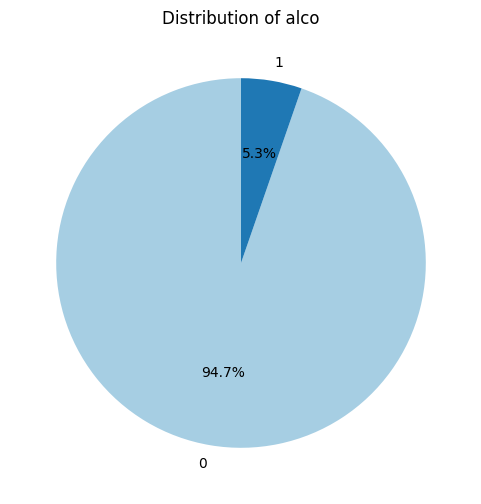

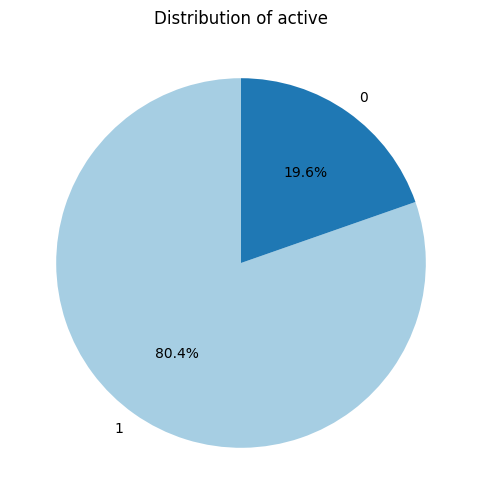

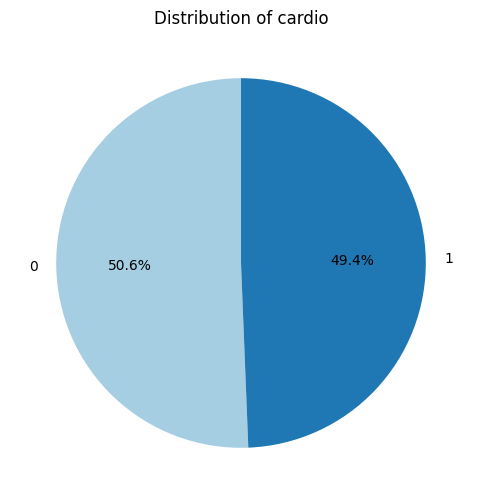

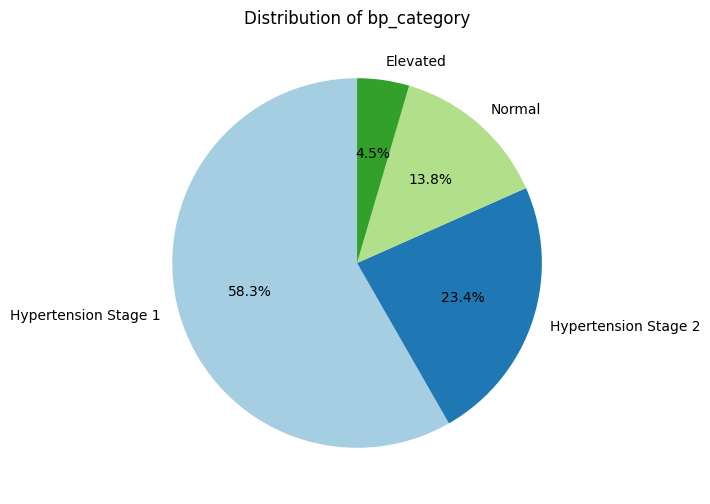

In [19]:


# Define the columns to plot (categorical and binary columns are the focus for pie charts)
columns_to_plot = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bp_category']

# Loop through each column to create a pie chart
for column in columns_to_plot:
    # Count unique values
    value_counts = data[column].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Distribution of {column}")
    plt.show()


# Data preprocessing 

In [20]:
data = data[['gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category_encoded']]
data

gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  \
0           2    110     80            1     1      0     0       1       0   
1           1    140     90            3     1      0     0       1       1   
2           1    130     70            3     1      0     0       0       1   
3           2    150    100            1     1      0     0       1       1   
4           1    100     60            1     1      0     0       0       0   
...       ...    ...    ...          ...   ...    ...   ...     ...     ...   
68200       2    120     80            1     1      1     0       1       0   
68201       1    140     90            2     2      0     0       1       1   
68202       2    180     90            3     1      0     1       0       1   
68203       1    135     80            1     2      0     0       0       1   
68204       1    120     80            2     1      0     0       1       0   

       age_years        bmi   bp_category_encoded  
0             50  21.967120  Hypertension Stage 1  
1             55  34.927679  Hypertension Stage 2  
2             51  23.507805  Hypertension Stage 1  
3             48  28.710479  Hypertension Stage 2  
4             47  23.011177                Normal  
...          ...        ...                   ...  
68200         52  26.927438  Hypertension Stage 1  
68201         61  50.472681  Hypertension Stage 2  
68202         52  31.353579  Hypertension Stage 2  
68203         61  27.099251  Hypertension Stage 1  
68204         56  24.913495  Hypertension Stage 1  

[68205 rows x 12 columns]

## Apply Label Encoder 

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to preserve the original
encoded_data = data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all columns (if applicable)
for column in encoded_data.columns:
    if encoded_data[column].dtype == 'object':  # Encode only object (categorical) columns
        encoded_data[column] = label_encoder.fit_transform(encoded_data[column])
data = encoded_data

In [22]:
data

gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  \
0           2    110     80            1     1      0     0       1       0   
1           1    140     90            3     1      0     0       1       1   
2           1    130     70            3     1      0     0       0       1   
3           2    150    100            1     1      0     0       1       1   
4           1    100     60            1     1      0     0       0       0   
...       ...    ...    ...          ...   ...    ...   ...     ...     ...   
68200       2    120     80            1     1      1     0       1       0   
68201       1    140     90            2     2      0     0       1       1   
68202       2    180     90            3     1      0     1       0       1   
68203       1    135     80            1     2      0     0       0       1   
68204       1    120     80            2     1      0     0       1       0   

       age_years        bmi  bp_category_encoded  
0             50  21.967120                    1  
1             55  34.927679                    2  
2             51  23.507805                    1  
3             48  28.710479                    2  
4             47  23.011177                    3  
...          ...        ...                  ...  
68200         52  26.927438                    1  
68201         61  50.472681                    2  
68202         52  31.353579                    2  
68203         61  27.099251                    1  
68204         56  24.913495                    1  

[68205 rows x 12 columns]

# Find Important Features Using RFE



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Define the features (X) and target (y)
X = data.drop(columns=[ 'cardio'])  # Exclude 'id' and target 'cardio'
y = data['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Apply RFE to identify important features
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Support': rfe.support_  # Boolean indicating if the feature was selected
}).sort_values(by='Ranking')

# Display the top features
print("Top Features Based on RFE:")
print(ranking[ranking['Support'] == True])


Top Features Based on RFE:
       Feature  Ranking  Support
1        ap_hi        1     True
2        ap_lo        1     True
3  cholesterol        1     True
8    age_years        1     True
9          bmi        1     True


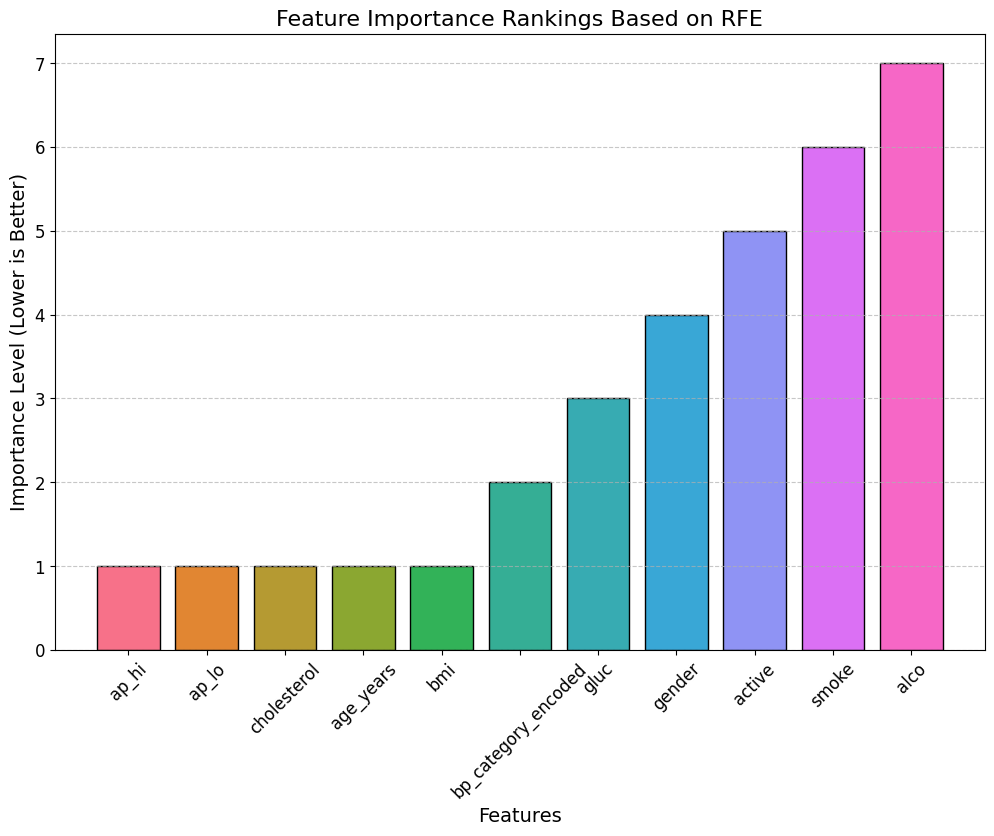

In [24]:


# Sort the rankings for better visualization
ranking_sorted = ranking.sort_values(by='Ranking')

# Generate a color palette
colors = sns.color_palette('husl', len(ranking_sorted))

# Plot the feature importance rankings with colorful bars
plt.figure(figsize=(12, 8))
plt.bar(ranking_sorted['Feature'], ranking_sorted['Ranking'], color=colors, edgecolor='black')
plt.title('Feature Importance Rankings Based on RFE', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance Level (Lower is Better)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Apply TSNE 

In [25]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.7 MB/s eta 0:00:00


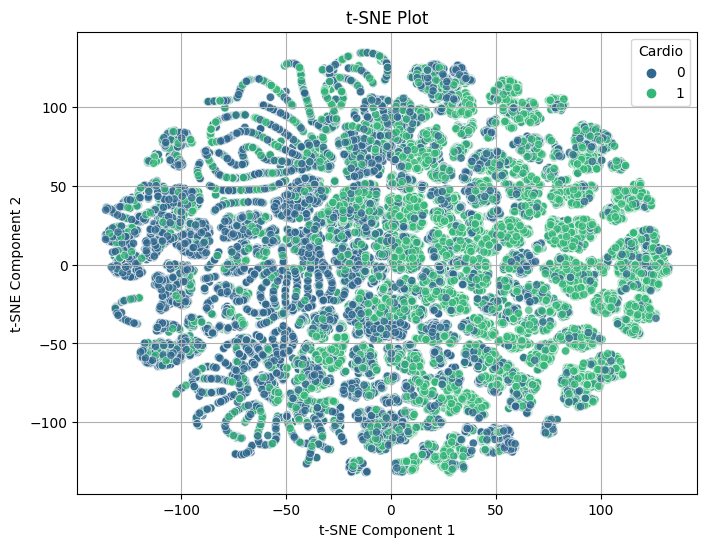

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


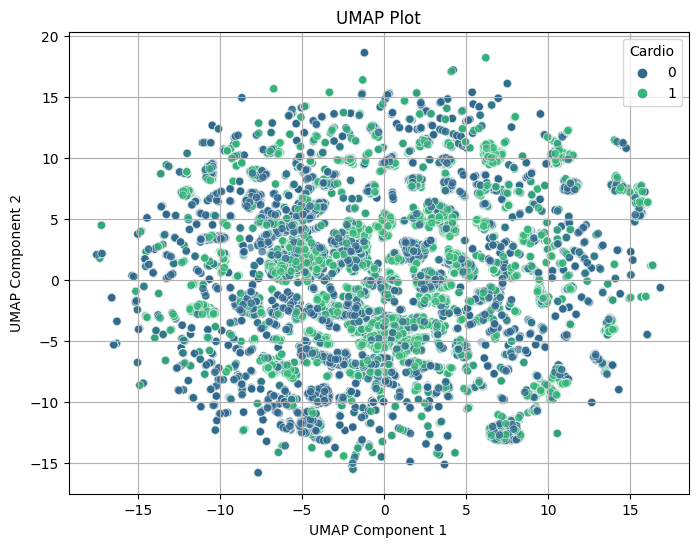

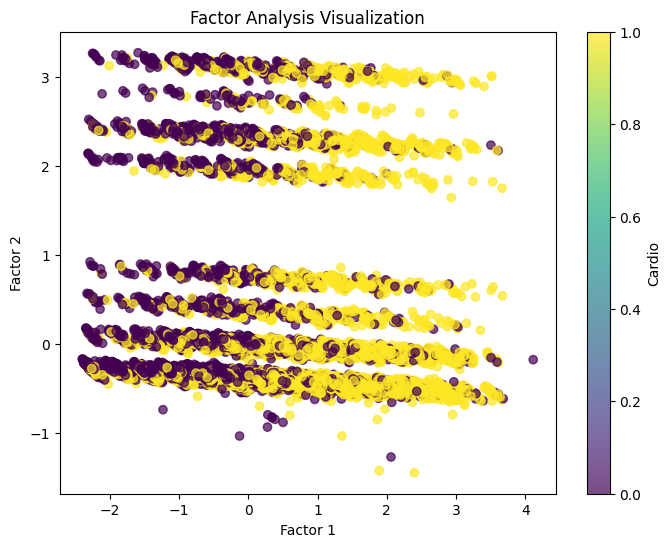

Feature contributions to Factors:
                      Factor1   Factor2
gender               0.072544  0.429169
ap_hi                0.907224 -0.016567
ap_lo                0.803720 -0.007357
cholesterol          0.225861 -0.021060
gluc                 0.120015 -0.027667
smoke                0.042888  0.780257
alco                 0.047545  0.424211
active              -0.001753  0.033301
age_years            0.227303 -0.081292
bmi                  0.258121 -0.071019
bp_category_encoded -0.077644 -0.007079


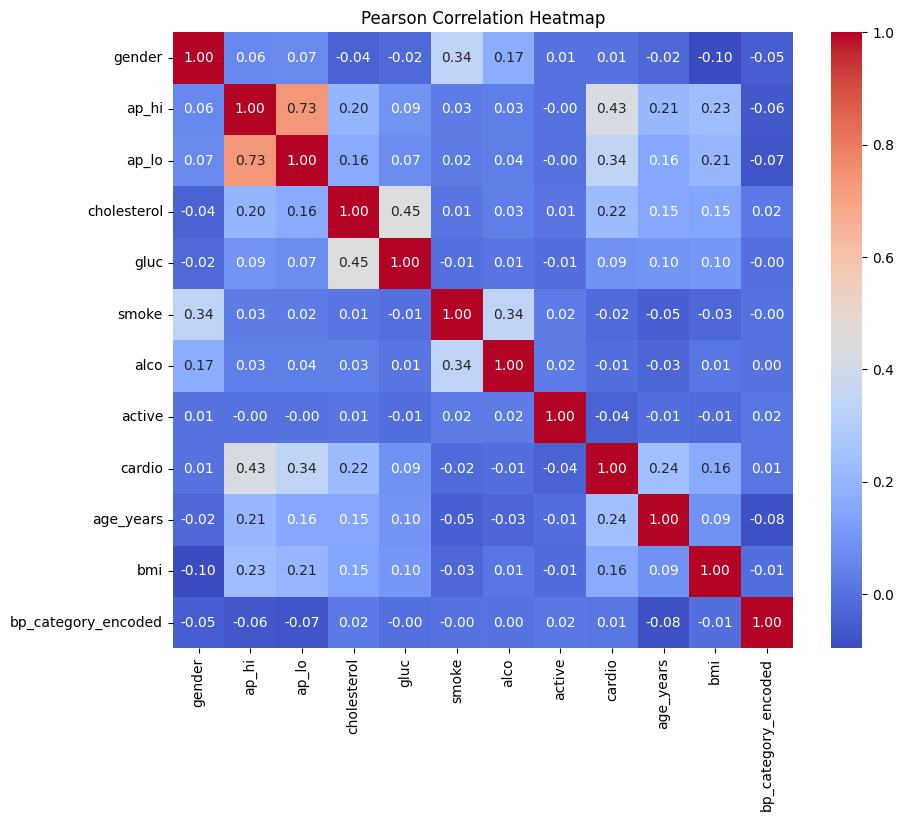

In [26]:

# Define features (X) and target (y)
X = data.drop(columns=['cardio'])  # Exclude 'id' and target column 'cardio'
y = data['cardio']

from sklearn.manifold import TSNE
from umap import UMAP


# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plotting t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="viridis", alpha=0.7)
plt.title("t-SNE Plot")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cardio", loc='best')
plt.grid(True)
plt.show()

# Plotting UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette="viridis", alpha=0.7)
plt.title("UMAP Plot")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Cardio", loc='best')
plt.grid(True)
plt.show()


# Apply Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X_scaled)

# Plot Factor Analysis results
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=data['cardio'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cardio')
plt.title('Factor Analysis Visualization')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

# Feature contributions to the factors
fa_df = pd.DataFrame(factor_analysis.components_, columns=X.columns, index=[f'Factor{i}' for i in range(1, 3)])
print("Feature contributions to Factors:")
print(fa_df.T)


# Pearson Correlation Plot
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap")
plt.show()



# Apply some model 

In [27]:


# Load dataset
X = data.drop(columns=[ 'cardio'])
y = data['cardio']

# # Standardize numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}


In [29]:
# Dictionary to store model performance
model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[model_name] = accuracy
    
    print(f"{model_name} Test Accuracy: {accuracy}\n")


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.6757892679112502

Training Random Forest...
Random Forest Test Accuracy: 0.6843417065780472

Training Support Vector Machine...
Support Vector Machine Test Accuracy: 0.7174274264490275

Training K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.6914280129019647

Training Decision Tree...
Decision Tree Test Accuracy: 0.6384517642459193

Training Naive Bayes...
Naive Bayes Test Accuracy: 0.7108298309060698

Training Gradient Boosting...
Gradient Boosting Test Accuracy: 0.7271527709901281

Training AdaBoost...
AdaBoost Test Accuracy: 0.7228521161176815

Training XGBoost...
XGBoost Test Accuracy: 0.7265663180529762

Training LightGBM...
[LightGBM] [Info] Number of positive: 23605, number of negative: 24138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

In [30]:
# Find the best-performing model
best_model_name = max(model_performance, key=model_performance.get)
best_model_accuracy = model_performance[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {best_model_accuracy}")

# Save the best model name and accuracy
with open("best_model.txt", "w") as f:
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Accuracy: {best_model_accuracy}\n")


The best model is: LightGBM with an accuracy of 0.7298895513635031


Model Performance Summary:
                    Model  Accuracy
9                LightGBM  0.729890
6       Gradient Boosting  0.727153
8                 XGBoost  0.726566
7                AdaBoost  0.722852
2  Support Vector Machine  0.717427
5             Naive Bayes  0.710830
3     K-Nearest Neighbors  0.691428
1           Random Forest  0.684342
0     Logistic Regression  0.675789
4           Decision Tree  0.638452


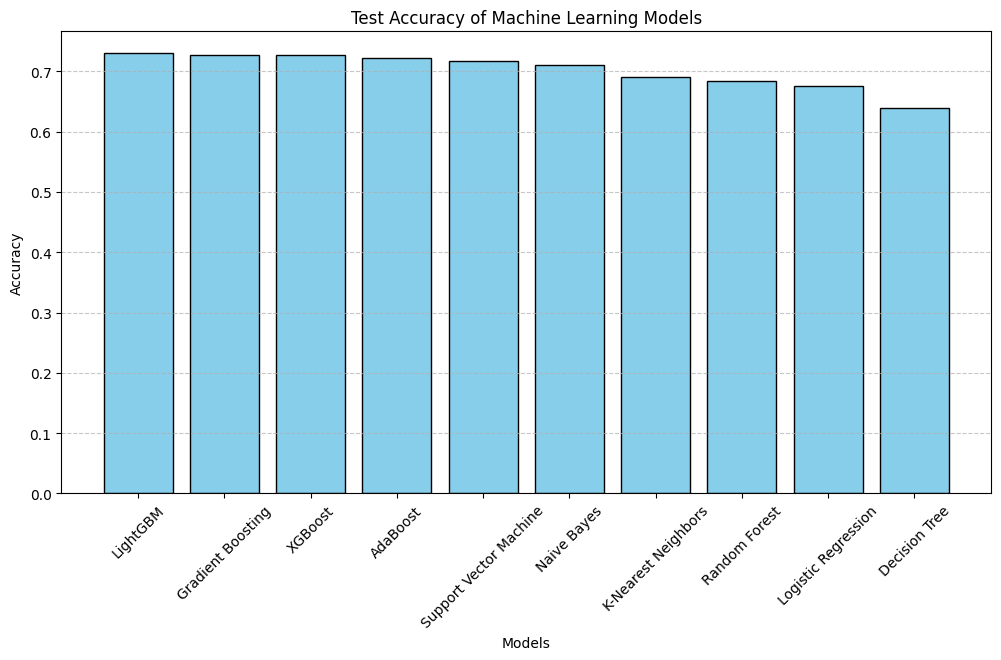

In [31]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(list(model_performance.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("Model Performance Summary:")
print(results_df)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(results_df["Model"], results_df["Accuracy"], color="skyblue", edgecolor="black")
plt.title("Test Accuracy of Machine Learning Models")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Apply top 3 model 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10395
           1       0.76      0.64      0.69     10067

    accuracy                           0.72     20462
   macro avg       0.73      0.72      0.72     20462
weighted avg       0.73      0.72      0.72     20462



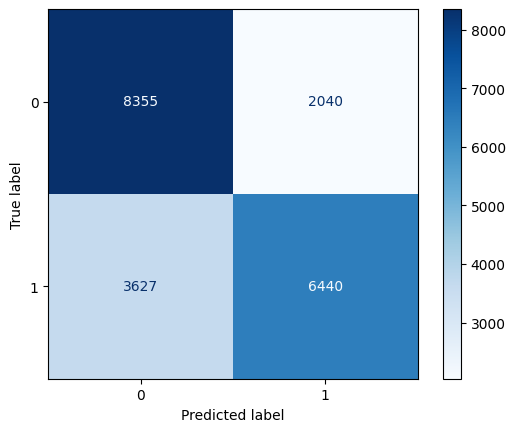

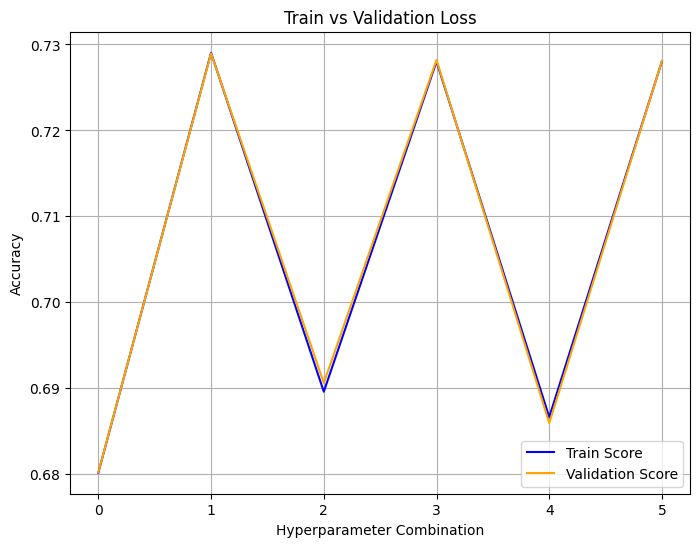

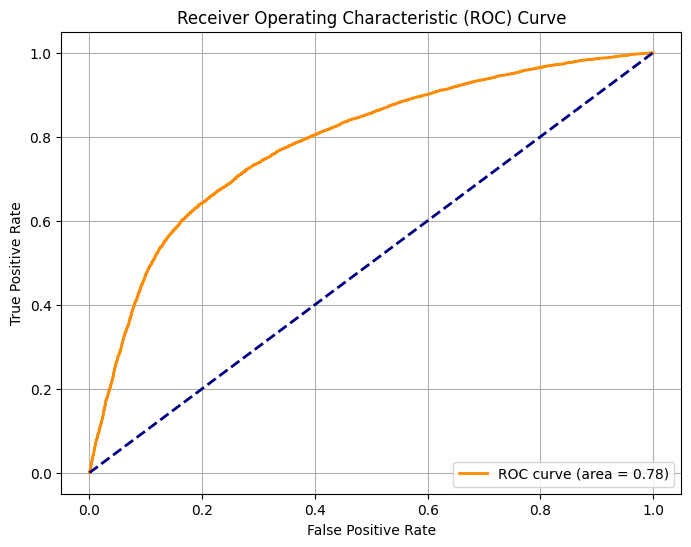

In [32]:
# Fine-tuning Logistic Regression


# Define hyperparameter grid and perform GridSearchCV with train scores
lr_params = {"C": [0.1, 1, 10], "solver": ['lbfgs', 'liblinear']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid=lr_params, cv=5, scoring="accuracy", return_train_score=True)
grid_lr.fit(X_train, y_train)

# Predictions
lr_best = grid_lr.best_estimator_
y_pred_lr = lr_best.predict(X_test)
y_pred_prob_lr = lr_best.predict_proba(X_test)[:, 1]

# Classification Report
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr).plot(cmap="Blues")

# Train and Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(grid_lr.cv_results_['mean_train_score'], label='Train Score', color='blue')
plt.plot(grid_lr.cv_results_['mean_test_score'], label='Validation Score', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.71      0.78      0.75     10395
           1       0.75      0.67      0.71     10067

    accuracy                           0.73     20462
   macro avg       0.73      0.73      0.73     20462
weighted avg       0.73      0.73      0.73     20462



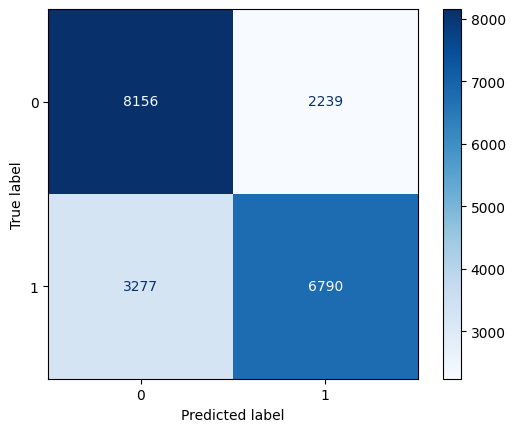

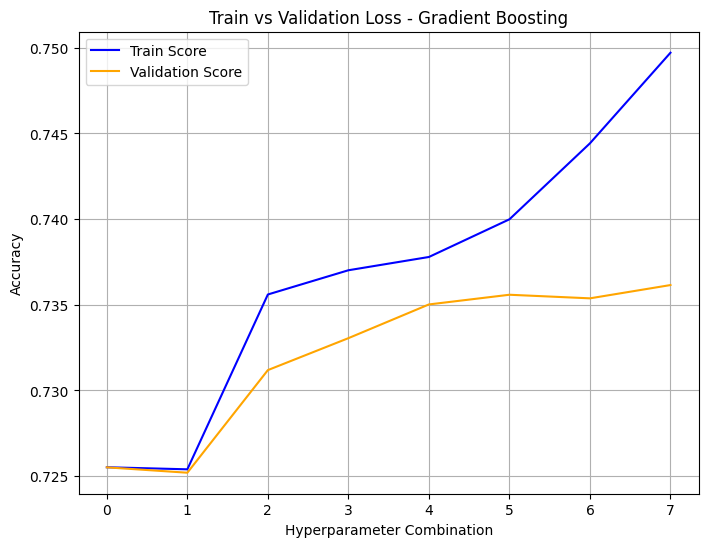

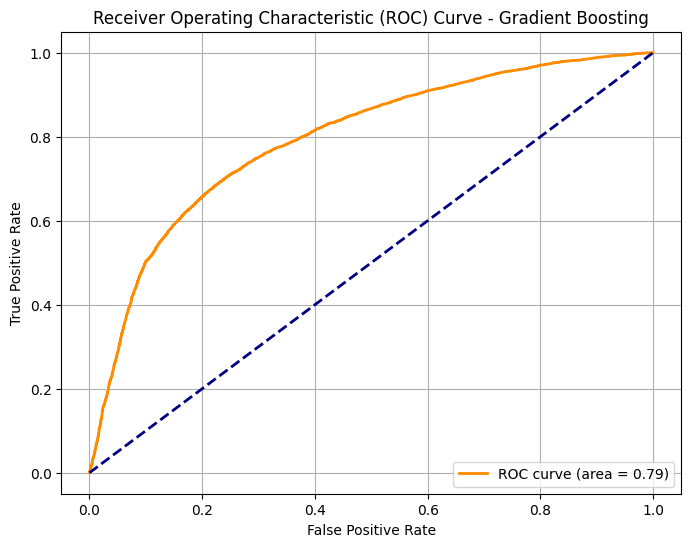

In [33]:


# Define hyperparameter grid and perform GridSearchCV with train scores
gb_params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=gb_params, cv=5, scoring="accuracy", return_train_score=True)
grid_gb.fit(X_train, y_train)

# Predictions
gb_best = grid_gb.best_estimator_
y_pred_gb = gb_best.predict(X_test)
y_pred_prob_gb = gb_best.predict_proba(X_test)[:, 1]

# Classification Report
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=cm_gb).plot(cmap="Blues")

# Train and Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(grid_gb.cv_results_['mean_train_score'], label='Train Score', color='blue')
plt.plot(grid_gb.cv_results_['mean_test_score'], label='Validation Score', color='orange')
plt.title('Train vs Validation Loss - Gradient Boosting')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10395
           1       0.75      0.67      0.71     10067

    accuracy                           0.73     20462
   macro avg       0.73      0.73      0.73     20462
weighted avg       0.73      0.73      0.73     20462



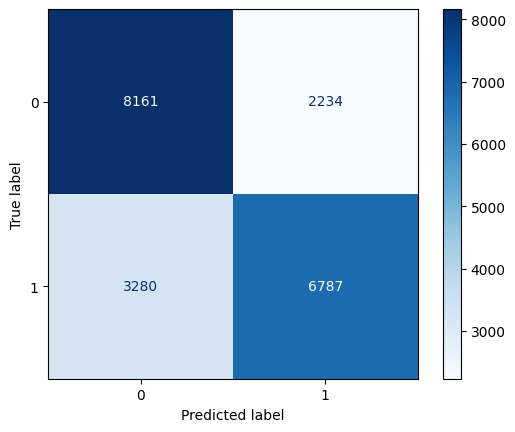

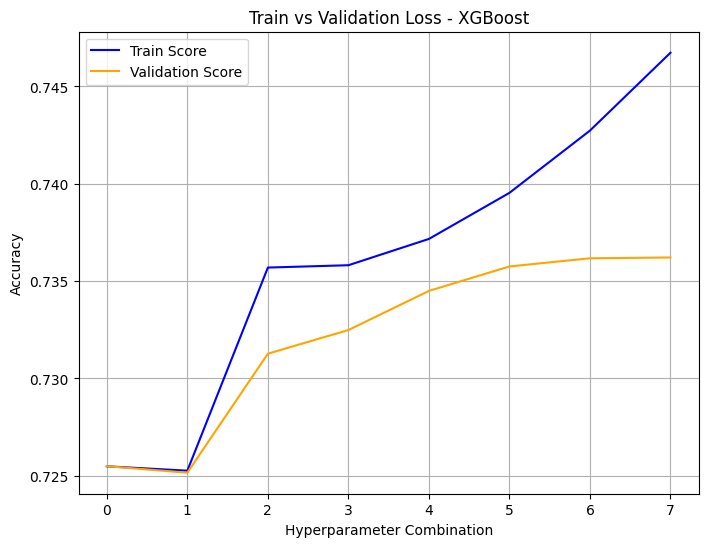

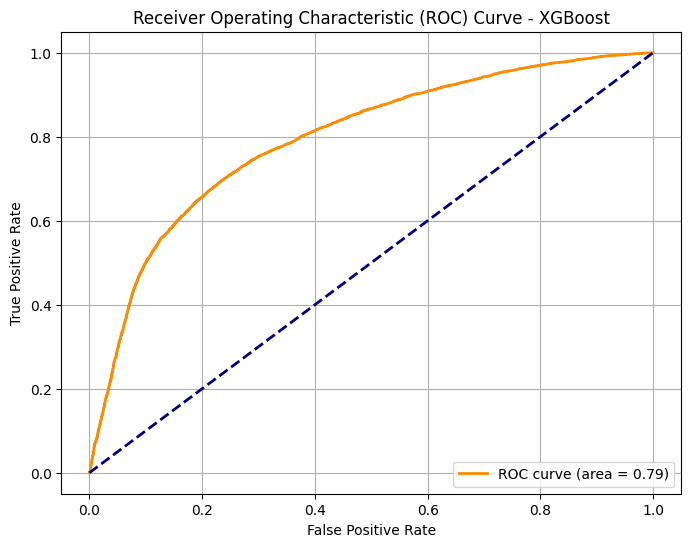

In [34]:
# Fine-tuning XGBoost


# Define hyperparameter grid and perform GridSearchCV with train scores
xgb_params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=xgb_params, cv=5, scoring="accuracy", return_train_score=True)
grid_xgb.fit(X_train, y_train)

# Predictions
xgb_best = grid_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
y_pred_prob_xgb = xgb_best.predict_proba(X_test)[:, 1]

# Classification Report
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot(cmap="Blues")

# Train and Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(grid_xgb.cv_results_['mean_train_score'], label='Train Score', color='blue')
plt.plot(grid_xgb.cv_results_['mean_test_score'], label='Validation Score', color='orange')
plt.title('Train vs Validation Loss - XGBoost')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Experiment with Top important Features 

In [35]:
data = data[['ap_hi', 'ap_lo', 'cholesterol', 'age_years', 'bmi', 'cardio']]
data

ap_hi  ap_lo  cholesterol  age_years        bmi  cardio
0        110     80            1         50  21.967120       0
1        140     90            3         55  34.927679       1
2        130     70            3         51  23.507805       1
3        150    100            1         48  28.710479       1
4        100     60            1         47  23.011177       0
...      ...    ...          ...        ...        ...     ...
68200    120     80            1         52  26.927438       0
68201    140     90            2         61  50.472681       1
68202    180     90            3         52  31.353579       1
68203    135     80            1         61  27.099251       1
68204    120     80            2         56  24.913495       0

[68205 rows x 6 columns]

In [36]:
# from sklearn.preprocessing import MinMaxScaler

# # Create a copy of the dataset to preserve the original
# normalized_data = data.copy()

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply normalization to all columns except the target column 'cardio'
# columns_to_normalize = ['ap_hi', 'ap_lo', 'cholesterol', 'age_years', 'bmi']
# normalized_data[columns_to_normalize] = scaler.fit_transform(normalized_data[columns_to_normalize])

# # Display the normalized dataset
# data = normalized_data


In [37]:
data

ap_hi  ap_lo  cholesterol  age_years        bmi  cardio
0        110     80            1         50  21.967120       0
1        140     90            3         55  34.927679       1
2        130     70            3         51  23.507805       1
3        150    100            1         48  28.710479       1
4        100     60            1         47  23.011177       0
...      ...    ...          ...        ...        ...     ...
68200    120     80            1         52  26.927438       0
68201    140     90            2         61  50.472681       1
68202    180     90            3         52  31.353579       1
68203    135     80            1         61  27.099251       1
68204    120     80            2         56  24.913495       0

[68205 rows x 6 columns]

In [38]:


# Load dataset
X = data.drop(columns=[ 'cardio'])
y = data['cardio']

# Standardize numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Logistic Regression

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10395
           1       0.75      0.65      0.69     10067

    accuracy                           0.72     20462
   macro avg       0.73      0.72      0.72     20462
weighted avg       0.72      0.72      0.72     20462



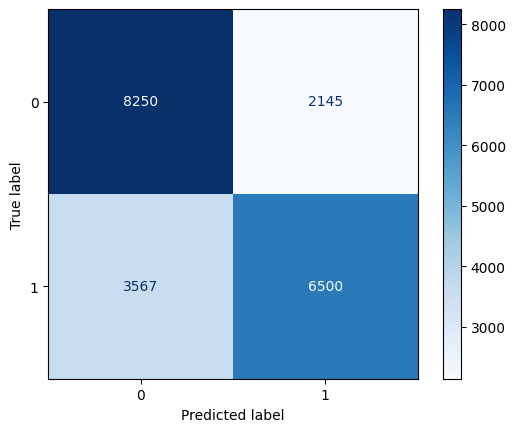

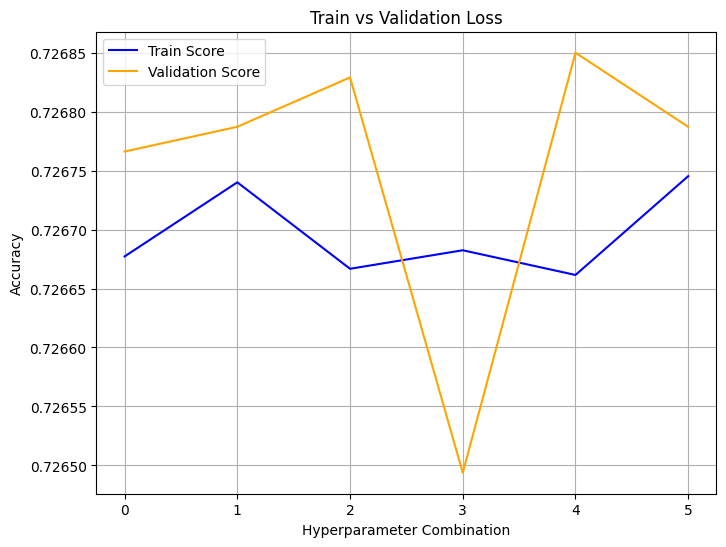

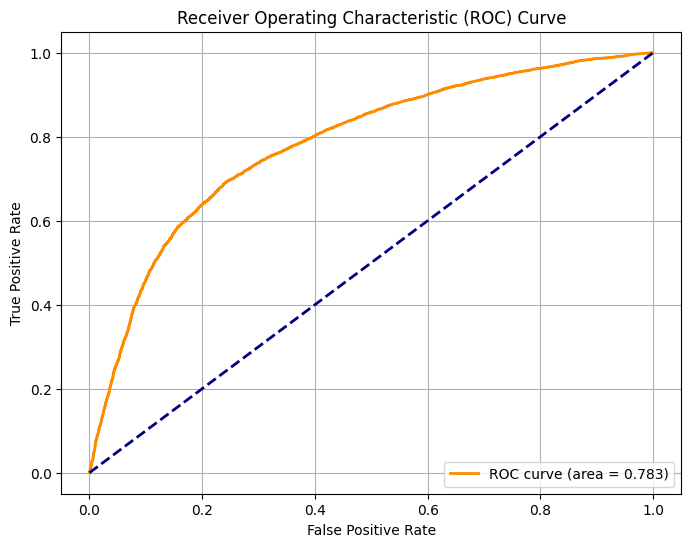

In [39]:


# Define hyperparameter grid and perform GridSearchCV with train scores
lr_params = {"C": [0.1, 1, 10], "solver": ['lbfgs', 'liblinear']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid=lr_params, cv=5, scoring="accuracy", return_train_score=True)
grid_lr.fit(X_train, y_train)

# Predictions
lr_best = grid_lr.best_estimator_
y_pred_lr = lr_best.predict(X_test)
y_pred_prob_lr = lr_best.predict_proba(X_test)[:, 1]

# Classification Report
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr).plot(cmap="Blues")

# Train and Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(grid_lr.cv_results_['mean_train_score'], label='Train Score', color='blue')
plt.plot(grid_lr.cv_results_['mean_test_score'], label='Validation Score', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Gradient Boosting

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10395
           1       0.74      0.68      0.71     10067

    accuracy                           0.73     20462
   macro avg       0.73      0.73      0.73     20462
weighted avg       0.73      0.73      0.73     20462



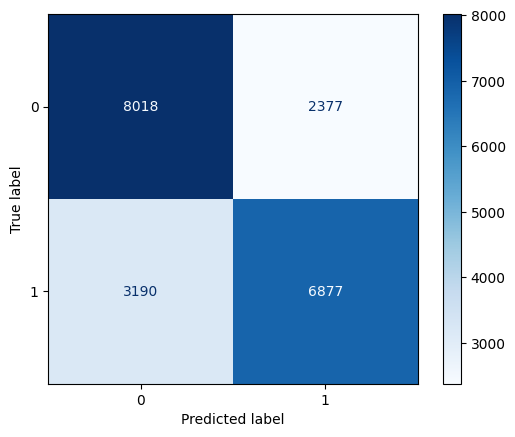

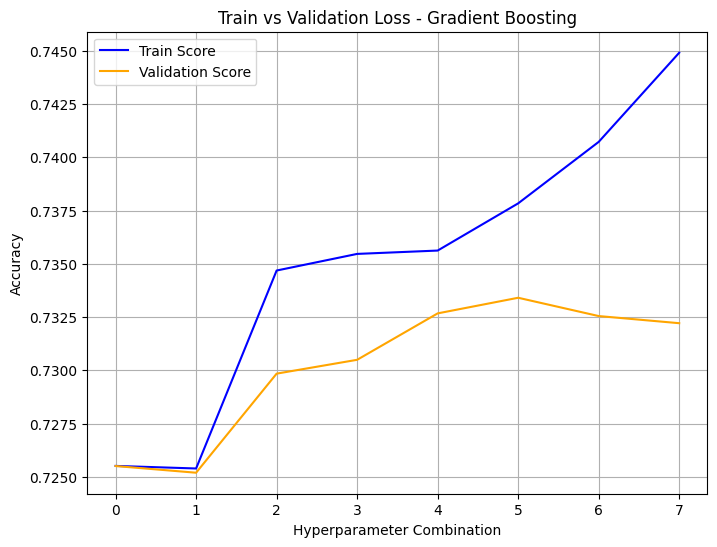

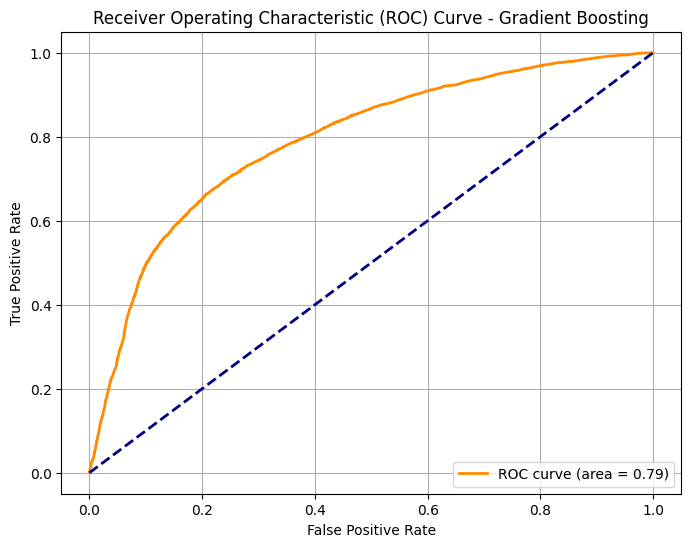

In [40]:


# Define hyperparameter grid and perform GridSearchCV with train scores
gb_params = {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=gb_params, cv=5, scoring="accuracy", return_train_score=True)
grid_gb.fit(X_train, y_train)

# Predictions
gb_best = grid_gb.best_estimator_
y_pred_gb = gb_best.predict(X_test)
y_pred_prob_gb = gb_best.predict_proba(X_test)[:, 1]

# Classification Report
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=cm_gb).plot(cmap="Blues")

# Train and Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(grid_gb.cv_results_['mean_train_score'], label='Train Score', color='blue')
plt.plot(grid_gb.cv_results_['mean_test_score'], label='Validation Score', color='orange')
plt.title('Train vs Validation Loss - Gradient Boosting')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## XGBoost

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.7342855997791998

Test Set Performance:
Accuracy: 0.7273971263806079
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10395
           1       0.75      0.67      0.71     10067

    accuracy                           0.73     20462
   macro avg       0.73      0.73      0.73     20462
weighted avg       0.73      0.73      0.73     20462

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10395
           1       0.75      0.67      0.71     10067

    accuracy                           0.73     20462
   macro avg       0.73      0.73      0.73     20462
weighted avg       0.73      0.73      0.73     20462



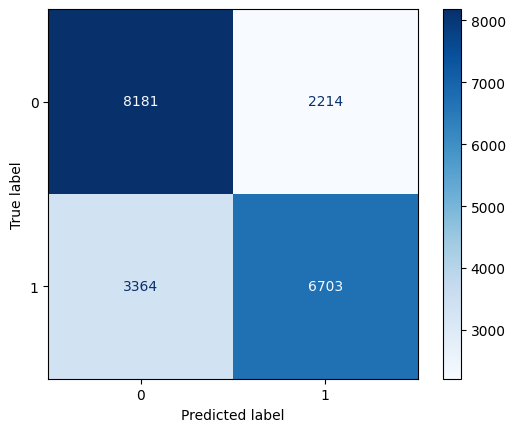

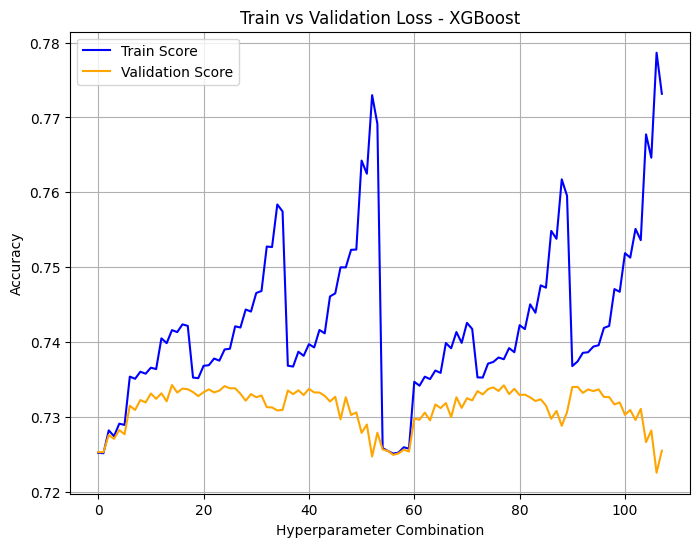

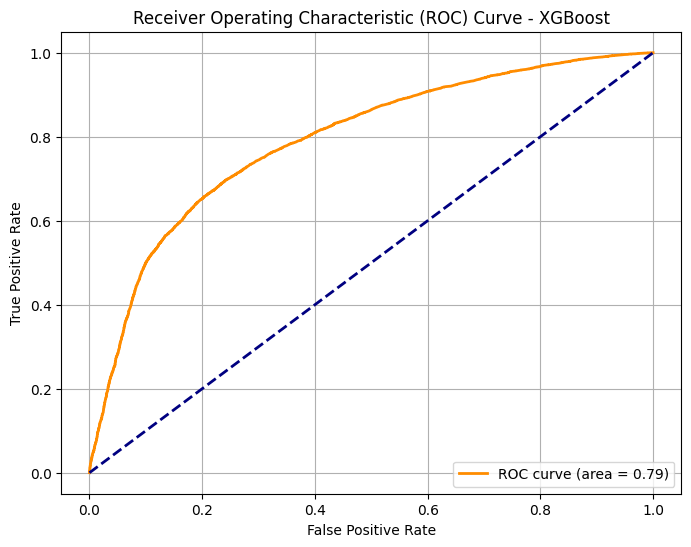

In [41]:

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameter grid
xgb_params = {
    "n_estimators": [50, 100, 150],          # Number of trees
    "learning_rate": [0.01, 0.1, 0.2],      # Step size shrinkage
    "max_depth": [3, 5, 7],                 # Maximum tree depth
    "subsample": [0.8, 1.0],                # Subsample ratio of training instances
    "colsample_bytree": [0.8, 1.0]          # Subsample ratio of columns
}

# Initialize the XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Perform GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    cv=5,
    scoring="accuracy",
    return_train_score=True,
    verbose=1
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_xgb.best_params_
best_score = grid_xgb.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate on the test set
best_xgb = grid_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Predictions
xgb_best = grid_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
y_pred_prob_xgb = xgb_best.predict_proba(X_test)[:, 1]

# Classification Report
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot(cmap="Blues")

# Train and Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(grid_xgb.cv_results_['mean_train_score'], label='Train Score', color='blue')
plt.plot(grid_xgb.cv_results_['mean_test_score'], label='Validation Score', color='orange')
plt.title('Train vs Validation Loss - XGBoost')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [42]:
import joblib

# Save the best model
best_model = grid_xgb.best_estimator_
joblib.dump(best_model, "model.pkl")
print("Best model saved as 'model.pkl'")

Best model saved as 'model.pkl'


In [43]:


# Later, you can load the model like this:
loaded_model = joblib.load("model.pkl")
print("Loaded Model:", loaded_model)

# Evaluate loaded model on the test set
y_pred_loaded = loaded_model.predict(X_test)
print("\nTest Set Performance (Loaded Model):")
print("Accuracy:", accuracy_score(y_test, y_pred_loaded))
print(classification_report(y_test, y_pred_loaded))


Loaded Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Test Set Performance (Loaded Model):
Accuracy: 0.7273971263806079
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10395
           1       0.75      0.67      0.71     1006

In [44]:
import joblib
import pandas as pd
import numpy as np

# Load the saved best model
best_model = joblib.load("model.pkl")

# Example JSON input
# json_input = {
#     "ap_hi": 120,
#     "ap_lo": 80,
#     "cholesterol": 1,
#     "age_years": 45,
#     "bmi": 22.5
# }

json_input = {
    "ap_hi": 120,
    "ap_lo": 80,
    "cholesterol": 1, 
    "age_years": 47,  
    "bmi": 26.573129         
}


# Convert JSON to DataFrame
input_data = pd.DataFrame([json_input])  # Create a DataFrame from the JSON input

# Preprocess the input data (scaling, encoding, etc.)
# Assuming the model was trained with normalized data:
from sklearn.preprocessing import MinMaxScaler

# Reuse the same scaler that was used during training
scaler = MinMaxScaler()
scaler.fit(X)  # Assuming `X` is the training data
normalized_input_data = scaler.transform(input_data)

# Make a prediction
prediction = best_model.predict(normalized_input_data)
predicted_probability = best_model.predict_proba(normalized_input_data)

# Print the prediction and probabilities
print("Input JSON:", json_input)
print("Predicted Cardio (0: No, 1: Yes):", int(prediction[0]))
print("Prediction Probabilities:", predicted_probability[0])


Input JSON: {'ap_hi': 120, 'ap_lo': 80, 'cholesterol': 1, 'age_years': 47, 'bmi': 26.573129}
Predicted Cardio (0: No, 1: Yes): 0
Prediction Probabilities: [0.7807597  0.21924031]


In [45]:
import pandas as pd

# Example: Display X_test and its predictions side by side with actual labels
# Assuming X_test, y_test, and the predictions are available
test_results = pd.DataFrame(X_test, columns=X.columns)  # Convert X_test to a DataFrame
test_results['Actual'] = y_test.values  # Add actual labels
test_results['Predicted'] = y_pred_loaded  # Add predicted labels


# Show first few rows of the test results for inspection
test_results.head()


ap_hi  ap_lo  cholesterol  age_years        bmi  Actual  Predicted
27320    110     70            1         63  23.828125       0          0
57460    160     90            2         63  47.451873       0          1
54916    120     80            1         47  26.573129       0          0
34252    110     80            1         51  20.195092       0          0
13524    120     80            1         59  23.808690       1          0